<a href="https://colab.research.google.com/github/CahyaniDyahRofiana/KP-DSC-1-/blob/main/Komoditas_harga_rendah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization
from keras.regularizers import l2
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
import random

##EKSPLORASI DATA

!pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model # Import the arch module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 17.7 MB/s eta 0:00:00


In [3]:
# Import Data

import pandas as pd
url = 'https://raw.githubusercontent.com/CahyaniDyahRofiana/KP-DSC-1-/main/Data/Imputasi/data.xlsx'  # Replace with your actual URL
raw_data = pd.read_excel(url)
semangka = pd.read_excel(url, sheet_name='Semangka')
kentang = pd.read_excel(url, sheet_name='Kentang')
bmb = pd.read_excel(url, sheet_name='Bawang Merah Bandung')
bmj = pd.read_excel(url, sheet_name='Bawang Merah Jabodetabek')
crb = pd.read_excel(url,sheet_name= 'Cabai Rawit Bandung')
crj = pd.read_excel(url,sheet_name= 'Cabai Rawit Jabodetabek')
ckb = pd.read_excel(url,sheet_name= 'Cabai Keriting Bandung')
ckj = pd.read_excel(url,sheet_name= 'Cabai Keriting Jabodetabek')

print(semangka)
print(kentang)

# Import Library

# @title Semangka

 # Memeriksa tipe data dari setiap kolom
print(semangka.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(semangka.head())

# Memeriksa jumlah data kosong dalam setiap kolom
semangka_missing_values = semangka.isnull().sum()
print(semangka)

# Memeriksa apakah ada data kosong secara keseluruhan
semangka_total_missing = semangka.isnull().sum().sum()
print(f"Total missing values: {semangka_total_missing}")
display(semangka)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
semangka['tanggal'] = pd.to_datetime(semangka['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(semangka.dtypes)
print(semangka['tanggal'].head())

# Memeriksa periode data
semangka_start_date = semangka['tanggal'].min()
semangka_end_date = semangka['tanggal'].max()

print(f"Periode data dari {semangka_start_date} hingga {semangka_end_date}")

from IPython.display import display
display(semangka)


# Menghapus kolom yang tidak diperlukan
data_semangka = semangka.drop(columns=['commodity','kategori_kota','komoditas_normalisasi']) # Use merged_df instead of df

print(semangka.head()) # Verify the changes
display(data_semangka)

       tanggal komoditas_normalisasi   commodity kategori_kota  \
0   2024-01-01              Semangka  Watermelon   Jabodetabek   
1   2024-01-02              Semangka  Watermelon   Jabodetabek   
2   2024-01-03              Semangka  Watermelon   Jabodetabek   
3   2024-01-04              Semangka  Watermelon   Jabodetabek   
4   2024-01-05              Semangka  Watermelon   Jabodetabek   
..         ...                   ...         ...           ...   
184 2024-07-03              Semangka  Watermelon   Jabodetabek   
185 2024-07-04              Semangka  Watermelon   Jabodetabek   
186 2024-07-05              Semangka  Watermelon   Jabodetabek   
187 2024-07-06              Semangka  Watermelon   Jabodetabek   
188 2024-07-07              Semangka  Watermelon   Jabodetabek   

     harga_rata_rata  harga_terendah  harga_tertinggi  
0           11233.33           10000            12000  
1           11393.94           10000            13000  
2           11333.33           10000   

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Semangka,Watermelon,Jabodetabek,11233.33,10000,12000
1,2024-01-02,Semangka,Watermelon,Jabodetabek,11393.94,10000,13000
2,2024-01-03,Semangka,Watermelon,Jabodetabek,11333.33,10000,13000
3,2024-01-04,Semangka,Watermelon,Jabodetabek,11322.58,10000,13000
4,2024-01-05,Semangka,Watermelon,Jabodetabek,11354.84,10000,13000
...,...,...,...,...,...,...,...
184,2024-07-03,Semangka,Watermelon,Jabodetabek,11789.47,10000,13000
185,2024-07-04,Semangka,Watermelon,Jabodetabek,12100.00,11000,13000
186,2024-07-05,Semangka,Watermelon,Jabodetabek,11684.21,10000,13000
187,2024-07-06,Semangka,Watermelon,Jabodetabek,11789.47,10000,13000


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                    int64
harga_tertinggi                   int64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-07 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Semangka,Watermelon,Jabodetabek,11233.33,10000,12000
1,2024-01-02,Semangka,Watermelon,Jabodetabek,11393.94,10000,13000
2,2024-01-03,Semangka,Watermelon,Jabodetabek,11333.33,10000,13000
3,2024-01-04,Semangka,Watermelon,Jabodetabek,11322.58,10000,13000
4,2024-01-05,Semangka,Watermelon,Jabodetabek,11354.84,10000,13000
...,...,...,...,...,...,...,...
184,2024-07-03,Semangka,Watermelon,Jabodetabek,11789.47,10000,13000
185,2024-07-04,Semangka,Watermelon,Jabodetabek,12100.00,11000,13000
186,2024-07-05,Semangka,Watermelon,Jabodetabek,11684.21,10000,13000
187,2024-07-06,Semangka,Watermelon,Jabodetabek,11789.47,10000,13000


     tanggal komoditas_normalisasi   commodity kategori_kota  harga_rata_rata  \
0 2024-01-01              Semangka  Watermelon   Jabodetabek         11233.33   
1 2024-01-02              Semangka  Watermelon   Jabodetabek         11393.94   
2 2024-01-03              Semangka  Watermelon   Jabodetabek         11333.33   
3 2024-01-04              Semangka  Watermelon   Jabodetabek         11322.58   
4 2024-01-05              Semangka  Watermelon   Jabodetabek         11354.84   

   harga_terendah  harga_tertinggi  
0           10000            12000  
1           10000            13000  
2           10000            13000  
3           10000            13000  
4           10000            13000  


,tanggal,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,11233.33,10000,12000
1,2024-01-02,11393.94,10000,13000
2,2024-01-03,11333.33,10000,13000
3,2024-01-04,11322.58,10000,13000
4,2024-01-05,11354.84,10000,13000
...,...,...,...,...
184,2024-07-03,11789.47,10000,13000
185,2024-07-04,12100.00,11000,13000
186,2024-07-05,11684.21,10000,13000
187,2024-07-06,11789.47,10000,13000


Jumlah data_semangka latih: 165
Jumlah data_semangka uji: 24


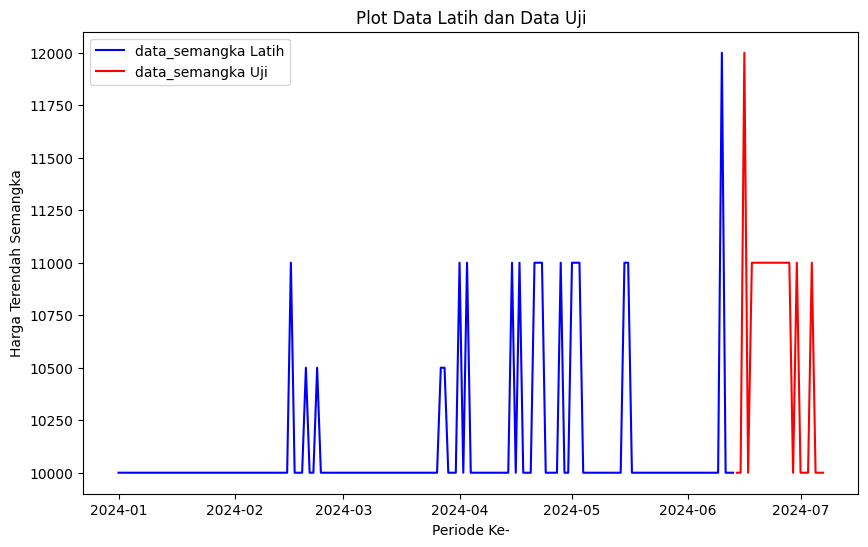

In [4]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_semangka = data_semangka.iloc[:165]  # Ambil 165 data_semangka pertama sebagai data_semangka latih
test_data_semangka = data_semangka.iloc[165:]   # Ambil 24 data_semangka sisanya sebagai data_semangka uji

# Menampilkan jumlah data_semangka dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_semangka latih:", len(train_data_semangka))
print("Jumlah data_semangka uji:", len(test_data_semangka))
# Membuat plot data_semangka latih dan data_semangka uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_semangka['tanggal'], train_data_semangka['harga_terendah'], label='data_semangka Latih', color='blue')
plt.plot(test_data_semangka['tanggal'], test_data_semangka['harga_terendah'], label='data_semangka Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah Semangka')
plt.legend()
plt.show()

In [5]:
# Mengambil kolom Semangka sebagai data yang akan diprediksi
time_series_data_semangka = data_semangka['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_semangka ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_semangka = scaler.fit_transform(time_series_data_semangka)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_semangka = len(time_series_data_semangka) - train_size

train_data_semangka = time_series_data_semangka[:train_size]
test_data_semangka = time_series_data_semangka[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_semangka, seq_length):
    sequences = []
    for i in range(len(data_semangka) - seq_length):
        sequences.append(data_semangka[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_semangka = create_sequences(train_data_semangka, seq_length)
X_test_semangka = create_sequences(test_data_semangka, seq_length)

# Memisahkan fitur dan target
y_train_semangka = X_train_semangka[:, -1]
X_train_semangka = X_train_semangka[:, :-1]
y_test_semangka = X_test_semangka[:, -1]
X_test_semangka = X_test_semangka[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_semangka = X_train_semangka.reshape(X_train_semangka.shape[0], X_train_semangka.shape[1], 1)
X_test_semangka = X_test_semangka.reshape(X_test_semangka.shape[0], X_test_semangka.shape[1], 1)

print("X_train_semangka shape:", X_train_semangka.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_semangka shape:", X_test_semangka.shape)    # Sama seperti di atas
print("y_train_semangka shape:", y_train_semangka.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_semangka shape:", y_test_semangka.shape)    # Sama seperti di atas

X_train_semangka shape: (161, 3, 1)
X_test_semangka shape: (20, 3, 1)
y_train_semangka shape: (161, 1)
y_test_semangka shape: (20, 1)


In [6]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_semangka = []

# Jumlah epoch yang akan diuji
epochs_to_test_semangka = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_semangka:
    history = model.fit(X_train_semangka, y_train_semangka, epochs=epoch, batch_size=16, validation_data=(X_test_semangka, y_test_semangka), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_semangka = model.predict(X_test_semangka)

    # Menghitung MSE
    mse_semangka = mean_squared_error(y_test_semangka, y_pred_semangka)

    # Menghitung AIC
    n_semangka = len(y_test_semangka)
    num_params_semangka = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_semangka)
    aic_semangka = calculate_aic(n_semangka, mse_semangka, num_params_semangka)

    # Menyimpan nilai AIC
    aic_values_semangka.append(aic_semangka)
    print(f"Epoch {epoch} - AIC: {aic_semangka} - MSE: {mse_semangka}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_semangka)



Epoch 1/5
11/11 [==============================] - 16s 460ms/step - loss: 8.6032 - val_loss: 7.3881
Epoch 2/5
11/11 [==============================] - 0s 28ms/step - loss: 7.2737 - val_loss: 6.3921
Epoch 3/5
11/11 [==============================] - 0s 18ms/step - loss: 6.2686 - val_loss: 5.5143
Epoch 4/5
11/11 [==============================] - 0s 18ms/step - loss: 5.4737 - val_loss: 4.7591
Epoch 5/5
1/1 [==============================] - 2s 2s/step
12
Epoch 5 - AIC: -17.746762575900156 - MSE: 0.12401681362798807
Epoch 1/10
11/11 [==============================] - 0s 35ms/step - loss: 4.0546 - val_loss: 3.5941
Epoch 2/10
11/11 [==============================] - 0s 22ms/step - loss: 3.6875 - val_loss: 3.1476
Epoch 3/10
11/11 [==============================] - 0s 32ms/step - loss: 3.1545 - val_loss: 2.7749
Epoch 4/10
11/11 [==============================] - 0s 19ms/step - loss: 2.9133 - val_loss: 2.4679
Epoch 5/10
11/11 [==============================] - 0s 20ms/step - loss: 2.5701 - val

In [7]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_semangka = Sequential()
model_semangka.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_semangka.add(BatchNormalization())
model_semangka.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_semangka.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_semangka.add(BatchNormalization())
model_semangka.add(Dropout(0.2))
model_semangka.add(Dense(1))
model_semangka.compile(optimizer='adam', loss='mse')
# Melatih model_semangka
history_semangka = model_semangka.fit(X_train_semangka, y_train_semangka, epochs=50, batch_size=16, validation_data=(X_test_semangka, y_test_semangka), verbose=1)

Epoch 1/50
11/11 [==============================] - 7s 158ms/step - loss: 8.6032 - val_loss: 7.3881
Epoch 2/50
11/11 [==============================] - 0s 16ms/step - loss: 7.2737 - val_loss: 6.3921
Epoch 3/50
11/11 [==============================] - 0s 18ms/step - loss: 6.2686 - val_loss: 5.5143
Epoch 4/50
11/11 [==============================] - 0s 18ms/step - loss: 5.4737 - val_loss: 4.7591
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 4.8553 - val_loss: 4.1167
Epoch 6/50
11/11 [==============================] - 0s 12ms/step - loss: 4.0994 - val_loss: 3.5956
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 3.7186 - val_loss: 3.1571
Epoch 8/50
11/11 [==============================] - 0s 11ms/step - loss: 3.2847 - val_loss: 2.7947
Epoch 9/50
11/11 [==============================] - 0s 11ms/step - loss: 2.9172 - val_loss: 2.4971
Epoch 10/50
11/11 [==============================] - 0s 14ms/step - loss: 2.5719 - val_loss: 2.2357
Epoch 11

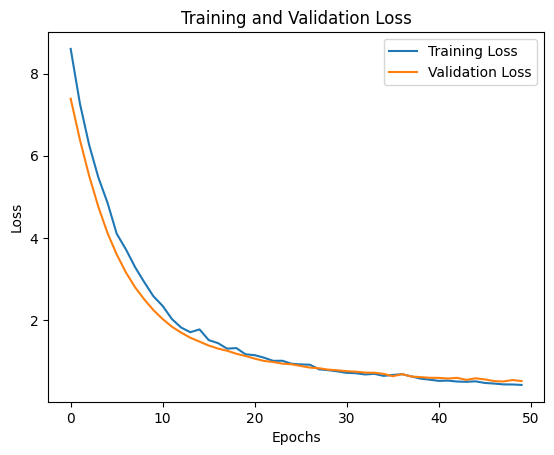

In [8]:
# Plot loss pada setiap epoch
plt.plot(history_semangka.history['loss'], label='Training Loss')
plt.plot(history_semangka.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 895ms/step


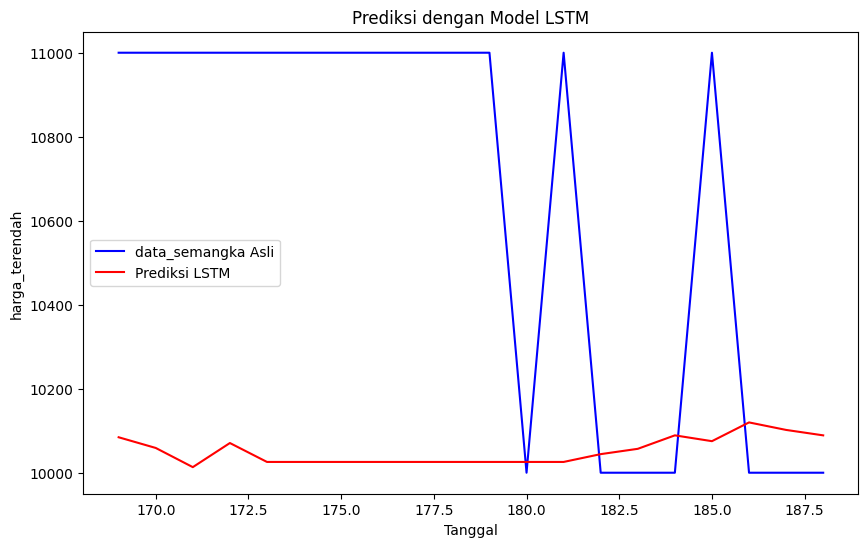

In [9]:
# Membuat prediksi dengan model LSTM
prediksi_semangka = model_semangka.predict(X_test_semangka)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_Semangka = scaler.inverse_transform(np.concatenate((X_test_semangka[:, -1], prediksi_semangka.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_semangka.index[train_size + seq_length:], data_semangka['harga_terendah'].values[train_size + seq_length:], label='data_semangka Asli', color='blue')
plt.plot(data_semangka.index[train_size + seq_length:], prediksiLSTM_Semangka, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [10]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_semangka = mean_absolute_percentage_error(data_semangka['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_Semangka)
print('MAPE:', mapeLSTM_semangka)

MAPE: 0.05941438231617213


1/1 [==============================] - 0s 22ms/step
Prediksi untuk 7 hari ke depan: [[10088.961]
 [10073.481]
 [10115.681]
 [10111.376]
 [10110.84 ]
 [10109.076]
 [10109.319]]


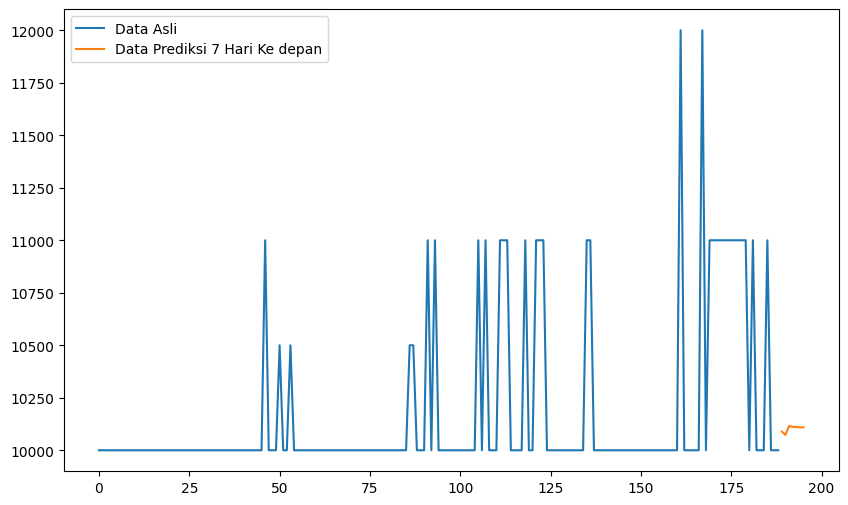

In [11]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_semangka = X_test_semangka[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_semangka = []
for i in range(future_steps):
    prediction = model_semangka.predict(future_data_semangka.reshape(1, seq_length - 1, 1))
    future_predictions_semangka.append(prediction[0, 0])
    future_data_semangka = np.append(future_data_semangka[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_semangka = scaler.inverse_transform(np.array(future_predictions_semangka).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_semangka)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_semangka)), scaler.inverse_transform(time_series_data_semangka), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_semangka), len(time_series_data_semangka) + future_steps), future_predictions_semangka, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [12]:
# @title Kentang

kentang = pd.read_excel(url, sheet_name='Kentang')

print(kentang)

 # Memeriksa tipe data dari setiap kolom
print(kentang.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(kentang.head())

# Memeriksa jumlah data kosong dalam setiap kolom
kentang_missing_values = kentang.isnull().sum()
print(kentang)

# Memeriksa apakah ada data kosong secara keseluruhan
kentang_total_missing = kentang.isnull().sum().sum()
print(f"Total missing values: {kentang_total_missing}")
display(kentang)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
kentang['tanggal'] = pd.to_datetime(kentang['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(kentang.dtypes)
print(kentang['tanggal'].head())

# Memeriksa periode data
kentang_start_date = kentang['tanggal'].min()
kentang_end_date = kentang['tanggal'].max()

print(f"Periode data dari {kentang_start_date} hingga {kentang_end_date}")

from IPython.display import display
display(kentang)


# Menghapus kolom yang tidak diperlukan
data_kentang = kentang.drop(columns=['commodity','kategori_kota','komoditas_normalisasi','harga_rata_rata','harga_tertinggi'])

print(kentang.head()) # Verify the changes
display(data_kentang)

       tanggal komoditas_normalisasi commodity kategori_kota  harga_rata_rata  \
0   2024-01-01               Kentang    Potato   Jabodetabek         17162.16   
1   2024-01-02               Kentang    Potato   Jabodetabek         17139.53   
2   2024-01-03               Kentang    Potato   Jabodetabek         17386.36   
3   2024-01-04               Kentang    Potato   Jabodetabek         17121.95   
4   2024-01-05               Kentang    Potato   Jabodetabek         17904.76   
..         ...                   ...       ...           ...              ...   
184 2024-07-03               Kentang    Potato   Jabodetabek         23642.86   
185 2024-07-04               Kentang    Potato   Jabodetabek         23466.67   
186 2024-07-05               Kentang    Potato   Jabodetabek         23172.41   
187 2024-07-06               Kentang    Potato   Jabodetabek         23259.26   
188 2024-07-07               Kentang    Potato   Jabodetabek         22666.67   

     harga_terendah  harga_

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Kentang,Potato,Jabodetabek,17162.16,16000,18000
1,2024-01-02,Kentang,Potato,Jabodetabek,17139.53,16000,18000
2,2024-01-03,Kentang,Potato,Jabodetabek,17386.36,16000,19000
3,2024-01-04,Kentang,Potato,Jabodetabek,17121.95,16000,18000
4,2024-01-05,Kentang,Potato,Jabodetabek,17904.76,16000,20000
...,...,...,...,...,...,...,...
184,2024-07-03,Kentang,Potato,Jabodetabek,23642.86,22000,25000
185,2024-07-04,Kentang,Potato,Jabodetabek,23466.67,22000,25000
186,2024-07-05,Kentang,Potato,Jabodetabek,23172.41,22000,25000
187,2024-07-06,Kentang,Potato,Jabodetabek,23259.26,22000,25000


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                    int64
harga_tertinggi                   int64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-07 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Kentang,Potato,Jabodetabek,17162.16,16000,18000
1,2024-01-02,Kentang,Potato,Jabodetabek,17139.53,16000,18000
2,2024-01-03,Kentang,Potato,Jabodetabek,17386.36,16000,19000
3,2024-01-04,Kentang,Potato,Jabodetabek,17121.95,16000,18000
4,2024-01-05,Kentang,Potato,Jabodetabek,17904.76,16000,20000
...,...,...,...,...,...,...,...
184,2024-07-03,Kentang,Potato,Jabodetabek,23642.86,22000,25000
185,2024-07-04,Kentang,Potato,Jabodetabek,23466.67,22000,25000
186,2024-07-05,Kentang,Potato,Jabodetabek,23172.41,22000,25000
187,2024-07-06,Kentang,Potato,Jabodetabek,23259.26,22000,25000


     tanggal komoditas_normalisasi commodity kategori_kota  harga_rata_rata  \
0 2024-01-01               Kentang    Potato   Jabodetabek         17162.16   
1 2024-01-02               Kentang    Potato   Jabodetabek         17139.53   
2 2024-01-03               Kentang    Potato   Jabodetabek         17386.36   
3 2024-01-04               Kentang    Potato   Jabodetabek         17121.95   
4 2024-01-05               Kentang    Potato   Jabodetabek         17904.76   

   harga_terendah  harga_tertinggi  
0           16000            18000  
1           16000            18000  
2           16000            19000  
3           16000            18000  
4           16000            20000  


,tanggal,harga_terendah
0,2024-01-01,16000
1,2024-01-02,16000
2,2024-01-03,16000
3,2024-01-04,16000
4,2024-01-05,16000
...,...,...
184,2024-07-03,22000
185,2024-07-04,22000
186,2024-07-05,22000
187,2024-07-06,22000


Jumlah data_kentang latih: 165
Jumlah data_kentang uji: 24


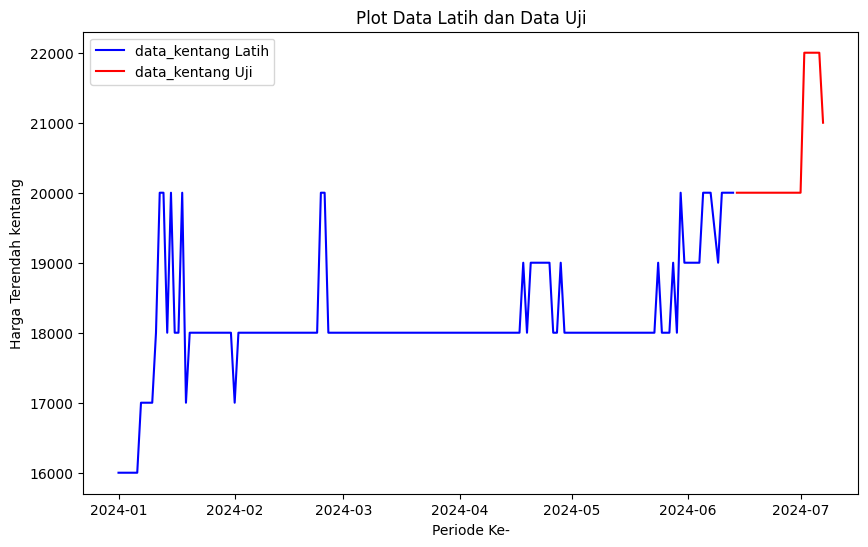

In [13]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_kentang = data_kentang.iloc[:165]  # Ambil 165 data_kentang pertama sebagai data_kentang latih
test_data_kentang = data_kentang.iloc[165:]   # Ambil 24 data_kentang sisanya sebagai data_kentang uji

# Menampilkan jumlah data_kentang dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_kentang latih:", len(train_data_kentang))
print("Jumlah data_kentang uji:", len(test_data_kentang))
# Membuat plot data_kentang latih dan data_kentang uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_kentang['tanggal'], train_data_kentang['harga_terendah'], label='data_kentang Latih', color='blue')
plt.plot(test_data_kentang['tanggal'], test_data_kentang['harga_terendah'], label='data_kentang Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah kentang')
plt.legend()
plt.show()

In [14]:
# Mengambil kolom kentang sebagai data yang akan diprediksi
time_series_data_kentang = data_kentang['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_kentang ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_kentang = scaler.fit_transform(time_series_data_kentang)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_kentang = len(time_series_data_kentang) - train_size

train_data_kentang = time_series_data_kentang[:train_size]
test_data_kentang = time_series_data_kentang[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_kentang, seq_length):
    sequences = []
    for i in range(len(data_kentang) - seq_length):
        sequences.append(data_kentang[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_kentang = create_sequences(train_data_kentang, seq_length)
X_test_kentang = create_sequences(test_data_kentang, seq_length)

# Memisahkan fitur dan target
y_train_kentang = X_train_kentang[:, -1]
X_train_kentang = X_train_kentang[:, :-1]
y_test_kentang = X_test_kentang[:, -1]
X_test_kentang = X_test_kentang[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_kentang = X_train_kentang.reshape(X_train_kentang.shape[0], X_train_kentang.shape[1], 1)
X_test_kentang = X_test_kentang.reshape(X_test_kentang.shape[0], X_test_kentang.shape[1], 1)

print("X_train_kentang shape:", X_train_kentang.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_kentang shape:", X_test_kentang.shape)    # Sama seperti di atas
print("y_train_kentang shape:", y_train_kentang.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_kentang shape:", y_test_kentang.shape)    # Sama seperti di atas

X_train_kentang shape: (161, 3, 1)
X_test_kentang shape: (20, 3, 1)
y_train_kentang shape: (161, 1)
y_test_kentang shape: (20, 1)


In [15]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_kentang = []

# Jumlah epoch yang akan diuji
epochs_to_test_kentang = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_kentang:
    history = model.fit(X_train_kentang, y_train_kentang, epochs=epoch, batch_size=16, validation_data=(X_test_kentang, y_test_kentang), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_kentang = model.predict(X_test_kentang)

    # Menghitung MSE
    mse_kentang = mean_squared_error(y_test_kentang, y_pred_kentang)

    # Menghitung AIC
    n_kentang = len(y_test_kentang)
    num_params_kentang = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_kentang)
    aic_kentang = calculate_aic(n_kentang, mse_kentang, num_params_kentang)

    # Menyimpan nilai AIC
    aic_values_kentang.append(aic_kentang)
    print(f"Epoch {epoch} - AIC: {aic_kentang} - MSE: {mse_kentang}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_kentang)



Epoch 1/5
11/11 [==============================] - 6s 111ms/step - loss: 8.8827 - val_loss: 7.7011
Epoch 2/5
11/11 [==============================] - 0s 10ms/step - loss: 7.6948 - val_loss: 6.6402
Epoch 3/5
11/11 [==============================] - 0s 11ms/step - loss: 6.4138 - val_loss: 5.7074
Epoch 4/5
11/11 [==============================] - 0s 10ms/step - loss: 5.7400 - val_loss: 4.9566
Epoch 5/5
1/1 [==============================] - 1s 868ms/step
12
Epoch 5 - AIC: -11.060462649861087 - MSE: 0.17324939508465995
Epoch 1/10
11/11 [==============================] - 0s 18ms/step - loss: 4.3329 - val_loss: 3.7642
Epoch 2/10
11/11 [==============================] - 0s 12ms/step - loss: 3.6440 - val_loss: 3.2955
Epoch 3/10
11/11 [==============================] - 0s 10ms/step - loss: 3.2768 - val_loss: 2.8975
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 2.8732 - val_loss: 2.5591
Epoch 5/10
11/11 [==============================] - 0s 13ms/step - loss: 2.7526 - v

In [16]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_kentang = Sequential()
model_kentang.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_kentang.add(BatchNormalization())
model_kentang.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_kentang.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_kentang.add(BatchNormalization())
model_kentang.add(Dropout(0.2))
model_kentang.add(Dense(1))
model_kentang.compile(optimizer='adam', loss='mse')
# Melatih model_kentang
history_kentang = model_kentang.fit(X_train_kentang, y_train_kentang, epochs=50, batch_size=16, validation_data=(X_test_kentang, y_test_kentang), verbose=1)

Epoch 1/50
11/11 [==============================] - 7s 159ms/step - loss: 8.8827 - val_loss: 7.7011
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 7.6948 - val_loss: 6.6402
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 6.4138 - val_loss: 5.7074
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 5.7400 - val_loss: 4.9566
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 4.9232 - val_loss: 4.2975
Epoch 6/50
11/11 [==============================] - 0s 14ms/step - loss: 4.1681 - val_loss: 3.7563
Epoch 7/50
11/11 [==============================] - 0s 14ms/step - loss: 3.7867 - val_loss: 3.2970
Epoch 8/50
11/11 [==============================] - 0s 13ms/step - loss: 3.2741 - val_loss: 2.9012
Epoch 9/50
11/11 [==============================] - 0s 11ms/step - loss: 3.0829 - val_loss: 2.5974
Epoch 10/50
11/11 [==============================] - 0s 11ms/step - loss: 2.7276 - val_loss: 2.3123
Epoch 11

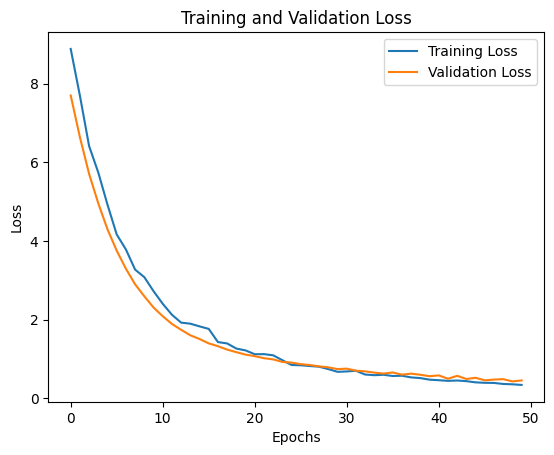

In [17]:
# Plot loss pada setiap epoch
plt.plot(history_kentang.history['loss'], label='Training Loss')
plt.plot(history_kentang.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 910ms/step


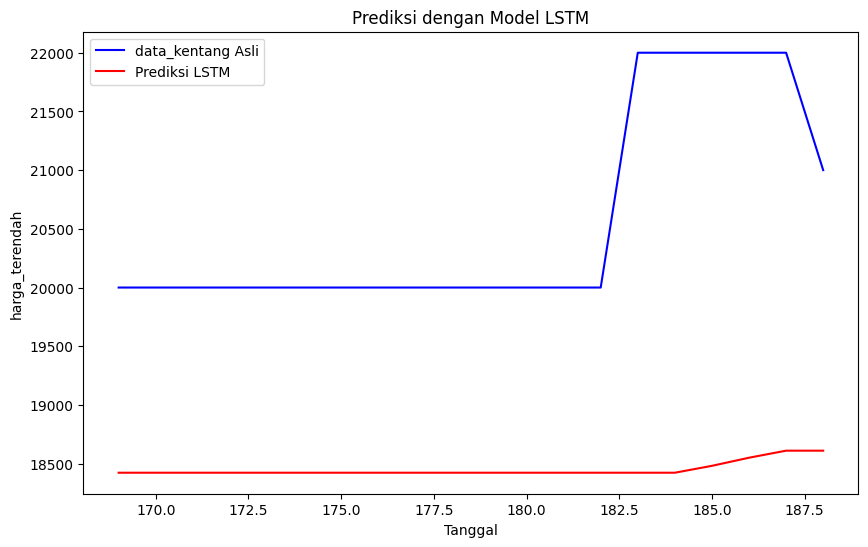

In [18]:
# Membuat prediksi dengan model LSTM
prediksi_kentang = model_kentang.predict(X_test_kentang)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_kentang = scaler.inverse_transform(np.concatenate((X_test_kentang[:, -1], prediksi_kentang.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_kentang.index[train_size + seq_length:], data_kentang['harga_terendah'].values[train_size + seq_length:], label='data_kentang Asli', color='blue')
plt.plot(data_kentang.index[train_size + seq_length:], prediksiLSTM_kentang, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [19]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_kentang = mean_absolute_percentage_error(data_kentang['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_kentang)
print('MAPE:', mapeLSTM_kentang)

MAPE: 0.10069309864467357


1/1 [==============================] - 0s 21ms/step
Prediksi untuk 7 hari ke depan: [[18610.541]
 [18511.398]
 [18391.223]
 [18283.047]
 [18272.816]
 [18265.24 ]
 [18261.455]]


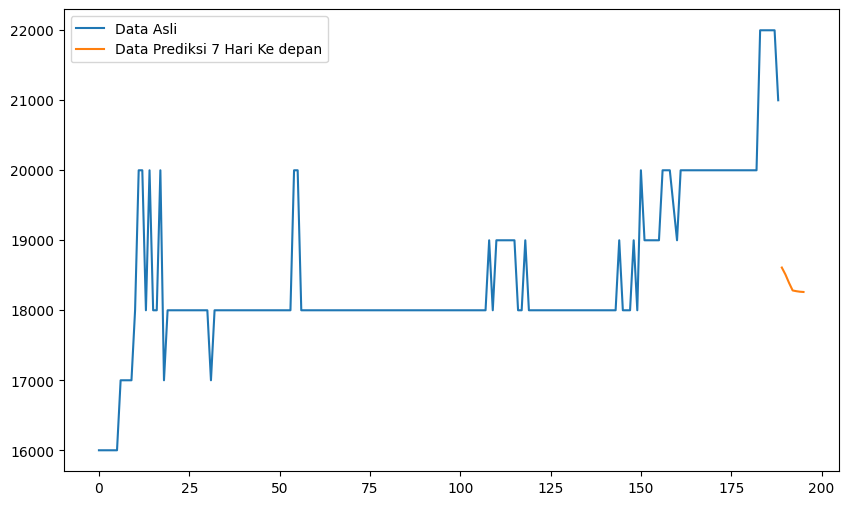

In [20]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_kentang = X_test_kentang[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_kentang = []
for i in range(future_steps):
    prediction = model_kentang.predict(future_data_kentang.reshape(1, seq_length - 1, 1))
    future_predictions_kentang.append(prediction[0, 0])
    future_data_kentang = np.append(future_data_kentang[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_kentang = scaler.inverse_transform(np.array(future_predictions_kentang).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_kentang)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_kentang)), scaler.inverse_transform(time_series_data_kentang), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_kentang), len(time_series_data_kentang) + future_steps), future_predictions_kentang, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [21]:
# @title Bawang Merah Kota Bandung

bmb = pd.read_excel(url, sheet_name='Bawang Merah Bandung')
print(bmb)

# Memeriksa tipe data dari setiap kolom
print(bmb.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(bmb.head())

# Memeriksa jumlah data kosong dalam setiap kolom
bmb_missing_values = bmb.isnull().sum()
print(bmb)

# Memeriksa apakah ada data kosong secara keseluruhan
bmb_total_missing = bmb.isnull().sum().sum()
print(f"Total missing values: {bmb_total_missing}")
display(bmb)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
bmb['tanggal'] = pd.to_datetime(bmb['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(bmb.dtypes)
print(bmb['tanggal'].head())

# Memeriksa periode data
bmb_start_date = bmb['tanggal'].min()
bmb_end_date = bmb['tanggal'].max()

print(f"Periode data dari {bmb_start_date} hingga {bmb_end_date}")

from IPython.display import display
display(bmb)


# Menghapus kolom yang tidak diperlukan
data_bmb = bmb.drop(columns=['commodity','kategori_kota','komoditas_normalisasi']) # Use merged_df instead of df

print(bmb.head()) # Verify the changes
display(data_bmb)

       tanggal komoditas_normalisasi commodity kategori_kota  harga_rata_rata  \
0   2024-01-01          Bawang Merah   Shallot       Bandung     41666.670000   
1   2024-01-02          Bawang Merah   Shallot       Bandung     41666.670000   
2   2024-01-03          Bawang Merah   Shallot       Bandung     41666.670000   
3   2024-01-04          Bawang Merah   Shallot       Bandung     41666.670000   
4   2024-01-05          Bawang Merah   Shallot       Bandung     41666.670000   
..         ...                   ...       ...           ...              ...   
185 2024-07-04          Bawang Merah   Shallot       Bandung     43333.330000   
186 2024-07-05          Bawang Merah   Shallot       Bandung     43333.330000   
187 2024-07-06                   NaN       NaN           NaN     47205.553333   
188 2024-07-07                   NaN       NaN           NaN     51077.776667   
189 2024-07-08          Bawang Merah   Shallot       Bandung     54950.000000   

     harga_terendah  harga_

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
1,2024-01-02,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
2,2024-01-03,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
3,2024-01-04,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
4,2024-01-05,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
...,...,...,...,...,...,...,...
185,2024-07-04,Bawang Merah,Shallot,Bandung,43333.330000,40000.000000,45000.000000
186,2024-07-05,Bawang Merah,Shallot,Bandung,43333.330000,40000.000000,45000.000000
187,2024-07-06,NaN,NaN,NaN,47205.553333,44983.333333,48316.666667
188,2024-07-07,NaN,NaN,NaN,51077.776667,49966.666667,51633.333333


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                  float64
harga_tertinggi                 float64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-08 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
1,2024-01-02,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
2,2024-01-03,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
3,2024-01-04,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
4,2024-01-05,Bawang Merah,Shallot,Bandung,41666.670000,35000.000000,45000.000000
...,...,...,...,...,...,...,...
185,2024-07-04,Bawang Merah,Shallot,Bandung,43333.330000,40000.000000,45000.000000
186,2024-07-05,Bawang Merah,Shallot,Bandung,43333.330000,40000.000000,45000.000000
187,2024-07-06,NaN,NaN,NaN,47205.553333,44983.333333,48316.666667
188,2024-07-07,NaN,NaN,NaN,51077.776667,49966.666667,51633.333333


     tanggal komoditas_normalisasi commodity kategori_kota  harga_rata_rata  \
0 2024-01-01          Bawang Merah   Shallot       Bandung         41666.67   
1 2024-01-02          Bawang Merah   Shallot       Bandung         41666.67   
2 2024-01-03          Bawang Merah   Shallot       Bandung         41666.67   
3 2024-01-04          Bawang Merah   Shallot       Bandung         41666.67   
4 2024-01-05          Bawang Merah   Shallot       Bandung         41666.67   

   harga_terendah  harga_tertinggi  
0         35000.0          45000.0  
1         35000.0          45000.0  
2         35000.0          45000.0  
3         35000.0          45000.0  
4         35000.0          45000.0  


,tanggal,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,41666.670000,35000.000000,45000.000000
1,2024-01-02,41666.670000,35000.000000,45000.000000
2,2024-01-03,41666.670000,35000.000000,45000.000000
3,2024-01-04,41666.670000,35000.000000,45000.000000
4,2024-01-05,41666.670000,35000.000000,45000.000000
...,...,...,...,...
185,2024-07-04,43333.330000,40000.000000,45000.000000
186,2024-07-05,43333.330000,40000.000000,45000.000000
187,2024-07-06,47205.553333,44983.333333,48316.666667
188,2024-07-07,51077.776667,49966.666667,51633.333333


Jumlah data_bmb latih: 165
Jumlah data_bmb uji: 25


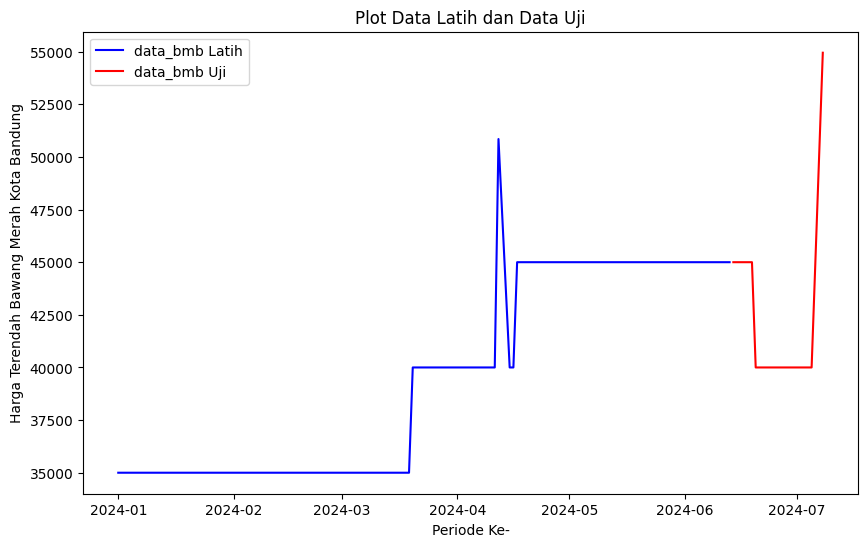

In [22]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_bmb = data_bmb.iloc[:165]  # Ambil 165 data_bmb pertama sebagai data_bmb latih
test_data_bmb = data_bmb.iloc[165:]   # Ambil 25 data_bmb sisanya sebagai data_bmb uji

# Menampilkan jumlah data_bmb dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_bmb latih:", len(train_data_bmb))
print("Jumlah data_bmb uji:", len(test_data_bmb))
# Membuat plot data_bmb latih dan data_bmb uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_bmb['tanggal'], train_data_bmb['harga_terendah'], label='data_bmb Latih', color='blue')
plt.plot(test_data_bmb['tanggal'], test_data_bmb['harga_terendah'], label='data_bmb Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah Bawang Merah Kota Bandung')
plt.legend()
plt.show()

In [23]:
# Mengambil kolom bmb sebagai data yang akan diprediksi
time_series_data_bmb = data_bmb['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_bmb ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_bmb = scaler.fit_transform(time_series_data_bmb)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_bmb = len(time_series_data_bmb) - train_size

train_data_bmb = time_series_data_bmb[:train_size]
test_data_bmb = time_series_data_bmb[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_bmb, seq_length):
    sequences = []
    for i in range(len(data_bmb) - seq_length):
        sequences.append(data_bmb[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_bmb = create_sequences(train_data_bmb, seq_length)
X_test_bmb = create_sequences(test_data_bmb, seq_length)

# Memisahkan fitur dan target
y_train_bmb = X_train_bmb[:, -1]
X_train_bmb = X_train_bmb[:, :-1]
y_test_bmb = X_test_bmb[:, -1]
X_test_bmb = X_test_bmb[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_bmb = X_train_bmb.reshape(X_train_bmb.shape[0], X_train_bmb.shape[1], 1)
X_test_bmb = X_test_bmb.reshape(X_test_bmb.shape[0], X_test_bmb.shape[1], 1)

print("X_train_bmb shape:", X_train_bmb.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_bmb shape:", X_test_bmb.shape)    # Sama seperti di atas
print("y_train_bmb shape:", y_train_bmb.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_bmb shape:", y_test_bmb.shape)    # Sama seperti di atas

X_train_bmb shape: (161, 3, 1)
X_test_bmb shape: (21, 3, 1)
y_train_bmb shape: (161, 1)
y_test_bmb shape: (21, 1)


In [24]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_bmb = []

# Jumlah epoch yang akan diuji
epochs_to_test_bmb = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_bmb:
    history = model.fit(X_train_bmb, y_train_bmb, epochs=epoch, batch_size=16, validation_data=(X_test_bmb, y_test_bmb), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_bmb = model.predict(X_test_bmb)

    # Menghitung MSE
    mse_bmb = mean_squared_error(y_test_bmb, y_pred_bmb)

    # Menghitung AIC
    n_bmb = len(y_test_bmb)
    num_params_bmb = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_bmb)
    aic_bmb = calculate_aic(n_bmb, mse_bmb, num_params_bmb)

    # Menyimpan nilai AIC
    aic_values_bmb.append(aic_bmb)
    print(f"Epoch {epoch} - AIC: {aic_bmb} - MSE: {mse_bmb}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_bmb)



Epoch 1/5
11/11 [==============================] - 6s 110ms/step - loss: 8.7173 - val_loss: 7.1990
Epoch 2/5
11/11 [==============================] - 0s 12ms/step - loss: 7.4052 - val_loss: 6.1167
Epoch 3/5
11/11 [==============================] - 0s 10ms/step - loss: 6.2954 - val_loss: 5.1896
Epoch 4/5
11/11 [==============================] - 0s 12ms/step - loss: 5.5070 - val_loss: 4.4075
Epoch 5/5
1/1 [==============================] - 1s 882ms/step
12
Epoch 5 - AIC: -50.552916353038455 - MSE: 0.028720650826925848
Epoch 1/10
11/11 [==============================] - 0s 19ms/step - loss: 4.0910 - val_loss: 3.2163
Epoch 2/10
11/11 [==============================] - 0s 11ms/step - loss: 3.5658 - val_loss: 2.7667
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 2.9860 - val_loss: 2.3914
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: 2.6501 - val_loss: 2.0809
Epoch 5/10
11/11 [==============================] - 0s 13ms/step - loss: 2.3757 - 

In [25]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_bmb = Sequential()
model_bmb.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_bmb.add(BatchNormalization())
model_bmb.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_bmb.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_bmb.add(BatchNormalization())
model_bmb.add(Dropout(0.2))
model_bmb.add(Dense(1))
model_bmb.compile(optimizer='adam', loss='mse')
# Melatih model_bmb
history_bmb = model_bmb.fit(X_train_bmb, y_train_bmb, epochs=50, batch_size=16, validation_data=(X_test_bmb, y_test_bmb), verbose=1)

Epoch 1/50
11/11 [==============================] - 7s 105ms/step - loss: 8.7173 - val_loss: 7.1990
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 7.4052 - val_loss: 6.1167
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 6.2954 - val_loss: 5.1896
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 5.5070 - val_loss: 4.4075
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 4.6963 - val_loss: 3.7523
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 4.0623 - val_loss: 3.2135
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 3.5260 - val_loss: 2.7619
Epoch 8/50
11/11 [==============================] - 0s 11ms/step - loss: 2.9770 - val_loss: 2.3887
Epoch 9/50
11/11 [==============================] - 0s 11ms/step - loss: 2.6588 - val_loss: 2.0794
Epoch 10/50
11/11 [==============================] - 0s 14ms/step - loss: 2.3634 - val_loss: 1.8214
Epoch 11

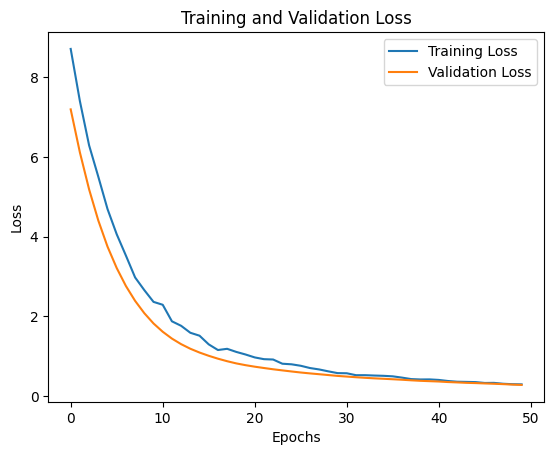

In [26]:
# Plot loss pada setiap epoch
plt.plot(history_bmb.history['loss'], label='Training Loss')
plt.plot(history_bmb.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


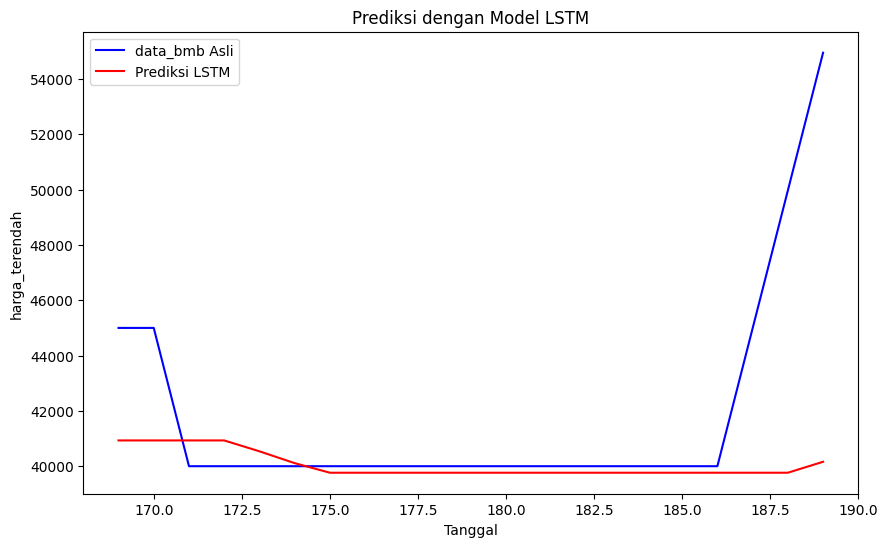

In [27]:
# Membuat prediksi dengan model LSTM
prediksi_bmb = model_bmb.predict(X_test_bmb)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_bmb = scaler.inverse_transform(np.concatenate((X_test_bmb[:, -1], prediksi_bmb.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_bmb.index[train_size + seq_length:], data_bmb['harga_terendah'].values[train_size + seq_length:], label='data_bmb Asli', color='blue')
plt.plot(data_bmb.index[train_size + seq_length:], prediksiLSTM_bmb, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [28]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_bmb = mean_absolute_percentage_error(data_bmb['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_bmb)
print('MAPE:', mapeLSTM_bmb)

MAPE: 0.04303311037786858


1/1 [==============================] - 0s 38ms/step
Prediksi untuk 7 hari ke depan: [[40159.125]
 [40204.797]
 [40139.473]
 [39804.086]
 [39775.027]
 [39739.316]
 [39710.676]]


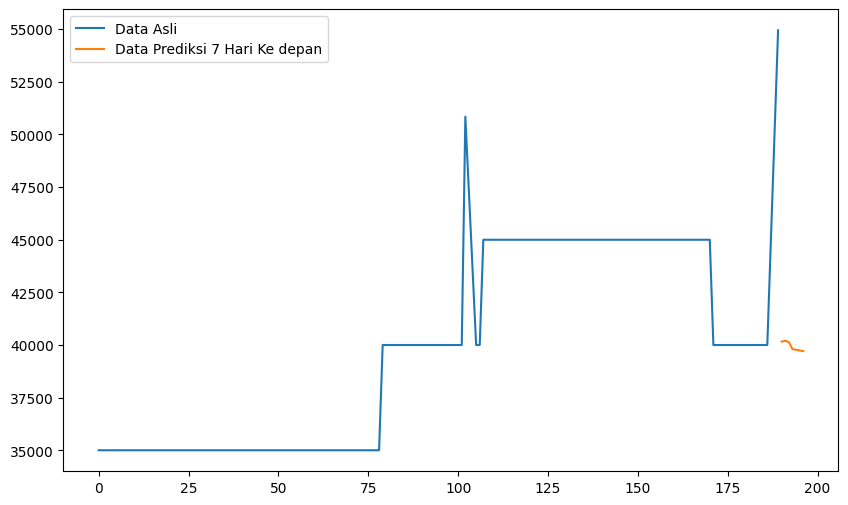

In [29]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_bmb = X_test_bmb[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_bmb = []
for i in range(future_steps):
    prediction = model_bmb.predict(future_data_bmb.reshape(1, seq_length - 1, 1))
    future_predictions_bmb.append(prediction[0, 0])
    future_data_bmb = np.append(future_data_bmb[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_bmb = scaler.inverse_transform(np.array(future_predictions_bmb).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_bmb)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_bmb)), scaler.inverse_transform(time_series_data_bmb), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_bmb), len(time_series_data_bmb) + future_steps), future_predictions_bmb, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [30]:
# @title Bawang Merah Jabodetabek

# Import Data
bmj = pd.read_excel(url, sheet_name='Bawang Merah Jabodetabek')
print(bmj)

# Memeriksa tipe data dari setiap kolom
print(bmj.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(bmj.head())

# Memeriksa jumlah data kosong dalam setiap kolom
bmj_missing_values = bmj.isnull().sum()
print(bmj)

# Memeriksa apakah ada data kosong secara keseluruhan
bmj_total_missing = bmj.isnull().sum().sum()
print(f"Total missing values: {bmj_total_missing}")
display(bmj)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
bmj['tanggal'] = pd.to_datetime(bmj['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(bmj.dtypes)
print(bmj['tanggal'].head())

# Memeriksa periode data
bmj_start_date = bmj['tanggal'].min()
bmj_end_date = bmj['tanggal'].max()

print(f"Periode data dari {bmj_start_date} hingga {bmj_end_date}")

from IPython.display import display
display(bmj)


# Menghapus kolom yang tidak diperlukan
data_bmj = bmj.drop(columns=['commodity','kategori_kota','komoditas_normalisasi']) # Use merged_df instead of df

print(bmj.head()) # Verify the changes
display(data_bmj)

       tanggal komoditas_normalisasi commodity kategori_kota  harga_rata_rata  \
0   2024-01-01          Bawang Merah   Shallot   Jabodetabek         41840.43   
1   2024-01-02          Bawang Merah   Shallot   Jabodetabek         42562.50   
2   2024-01-03          Bawang Merah   Shallot   Jabodetabek         42552.63   
3   2024-01-04          Bawang Merah   Shallot   Jabodetabek         42324.07   
4   2024-01-05          Bawang Merah   Shallot   Jabodetabek         42463.64   
..         ...                   ...       ...           ...              ...   
185 2024-07-04          Bawang Merah   Shallot   Jabodetabek         43562.50   
186 2024-07-05          Bawang Merah   Shallot   Jabodetabek         43619.05   
187 2024-07-06          Bawang Merah   Shallot   Jabodetabek         40296.30   
188 2024-07-07          Bawang Merah   Shallot   Jabodetabek         41300.00   
189 2024-07-08          Bawang Merah   Shallot   Jabodetabek         55800.00   

     harga_terendah  harga_

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Bawang Merah,Shallot,Jabodetabek,41840.43,38000,45000
1,2024-01-02,Bawang Merah,Shallot,Jabodetabek,42562.50,40000,45000
2,2024-01-03,Bawang Merah,Shallot,Jabodetabek,42552.63,40000,45000
3,2024-01-04,Bawang Merah,Shallot,Jabodetabek,42324.07,40000,45000
4,2024-01-05,Bawang Merah,Shallot,Jabodetabek,42463.64,40000,45000
...,...,...,...,...,...,...,...
185,2024-07-04,Bawang Merah,Shallot,Jabodetabek,43562.50,39000,50000
186,2024-07-05,Bawang Merah,Shallot,Jabodetabek,43619.05,39000,50000
187,2024-07-06,Bawang Merah,Shallot,Jabodetabek,40296.30,35000,45000
188,2024-07-07,Bawang Merah,Shallot,Jabodetabek,41300.00,37000,45000


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                    int64
harga_tertinggi                   int64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-08 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Bawang Merah,Shallot,Jabodetabek,41840.43,38000,45000
1,2024-01-02,Bawang Merah,Shallot,Jabodetabek,42562.50,40000,45000
2,2024-01-03,Bawang Merah,Shallot,Jabodetabek,42552.63,40000,45000
3,2024-01-04,Bawang Merah,Shallot,Jabodetabek,42324.07,40000,45000
4,2024-01-05,Bawang Merah,Shallot,Jabodetabek,42463.64,40000,45000
...,...,...,...,...,...,...,...
185,2024-07-04,Bawang Merah,Shallot,Jabodetabek,43562.50,39000,50000
186,2024-07-05,Bawang Merah,Shallot,Jabodetabek,43619.05,39000,50000
187,2024-07-06,Bawang Merah,Shallot,Jabodetabek,40296.30,35000,45000
188,2024-07-07,Bawang Merah,Shallot,Jabodetabek,41300.00,37000,45000


     tanggal komoditas_normalisasi commodity kategori_kota  harga_rata_rata  \
0 2024-01-01          Bawang Merah   Shallot   Jabodetabek         41840.43   
1 2024-01-02          Bawang Merah   Shallot   Jabodetabek         42562.50   
2 2024-01-03          Bawang Merah   Shallot   Jabodetabek         42552.63   
3 2024-01-04          Bawang Merah   Shallot   Jabodetabek         42324.07   
4 2024-01-05          Bawang Merah   Shallot   Jabodetabek         42463.64   

   harga_terendah  harga_tertinggi  
0           38000            45000  
1           40000            45000  
2           40000            45000  
3           40000            45000  
4           40000            45000  


,tanggal,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,41840.43,38000,45000
1,2024-01-02,42562.50,40000,45000
2,2024-01-03,42552.63,40000,45000
3,2024-01-04,42324.07,40000,45000
4,2024-01-05,42463.64,40000,45000
...,...,...,...,...
185,2024-07-04,43562.50,39000,50000
186,2024-07-05,43619.05,39000,50000
187,2024-07-06,40296.30,35000,45000
188,2024-07-07,41300.00,37000,45000


Jumlah data_bmj latih: 165
Jumlah data_bmj uji: 25


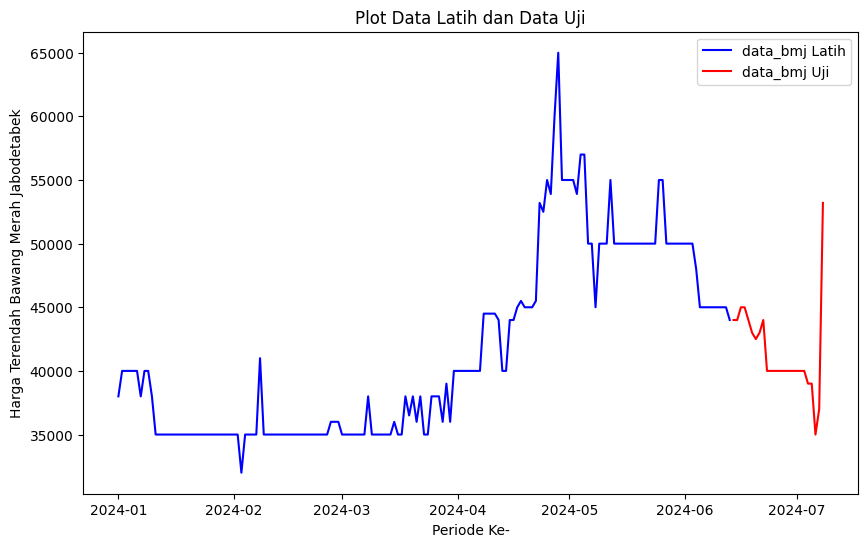

In [31]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_bmj = data_bmj.iloc[:165]  # Ambil 165 data_bmj pertama sebagai data_bmj latih
test_data_bmj = data_bmj.iloc[165:]   # Ambil 24 data_bmj sisanya sebagai data_bmj uji

# Menampilkan jumlah data_bmj dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_bmj latih:", len(train_data_bmj))
print("Jumlah data_bmj uji:", len(test_data_bmj))
# Membuat plot data_bmj latih dan data_bmj uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_bmj['tanggal'], train_data_bmj['harga_terendah'], label='data_bmj Latih', color='blue')
plt.plot(test_data_bmj['tanggal'], test_data_bmj['harga_terendah'], label='data_bmj Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah Bawang Merah Jabodetabek')
plt.legend()
plt.show()

In [32]:
# Mengambil kolom Semangka sebagai data yang akan diprediksi
time_series_data_bmj = data_bmj['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_bmj ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_bmj = scaler.fit_transform(time_series_data_bmj)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_bmj = len(time_series_data_bmj) - train_size

train_data_bmj = time_series_data_bmj[:train_size]
test_data_bmj = time_series_data_bmj[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_bmj, seq_length):
    sequences = []
    for i in range(len(data_bmj) - seq_length):
        sequences.append(data_bmj[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_bmj = create_sequences(train_data_bmj, seq_length)
X_test_bmj = create_sequences(test_data_bmj, seq_length)

# Memisahkan fitur dan target
y_train_bmj = X_train_bmj[:, -1]
X_train_bmj = X_train_bmj[:, :-1]
y_test_bmj = X_test_bmj[:, -1]
X_test_bmj = X_test_bmj[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_bmj = X_train_bmj.reshape(X_train_bmj.shape[0], X_train_bmj.shape[1], 1)
X_test_bmj = X_test_bmj.reshape(X_test_bmj.shape[0], X_test_bmj.shape[1], 1)

print("X_train_bmj shape:", X_train_bmj.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_bmj shape:", X_test_bmj.shape)    # Sama seperti di atas
print("y_train_bmj shape:", y_train_bmj.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_bmj shape:", y_test_bmj.shape)    # Sama seperti di atas

X_train_bmj shape: (161, 3, 1)
X_test_bmj shape: (21, 3, 1)
y_train_bmj shape: (161, 1)
y_test_bmj shape: (21, 1)


In [33]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_bmj = []

# Jumlah epoch yang akan diuji
epochs_to_test_bmj = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_bmj:
    history = model.fit(X_train_bmj, y_train_bmj, epochs=epoch, batch_size=16, validation_data=(X_test_bmj, y_test_bmj), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_bmj = model.predict(X_test_bmj)

    # Menghitung MSE
    mse_bmj = mean_squared_error(y_test_bmj, y_pred_bmj)

    # Menghitung AIC
    n_bmj = len(y_test_bmj)
    num_params_bmj = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_bmj)
    aic_bmj = calculate_aic(n_bmj, mse_bmj, num_params_bmj)

    # Menyimpan nilai AIC
    aic_values_bmj.append(aic_bmj)
    print(f"Epoch {epoch} - AIC: {aic_bmj} - MSE: {mse_bmj}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_bmj)



Epoch 1/5
11/11 [==============================] - 6s 114ms/step - loss: 8.6766 - val_loss: 7.2054
Epoch 2/5
11/11 [==============================] - 0s 10ms/step - loss: 7.4173 - val_loss: 6.1591
Epoch 3/5
11/11 [==============================] - 0s 10ms/step - loss: 6.4554 - val_loss: 5.2788
Epoch 4/5
11/11 [==============================] - 0s 10ms/step - loss: 5.6623 - val_loss: 4.5283
Epoch 5/5
1/1 [==============================] - 1s 896ms/step
12
Epoch 5 - AIC: -87.81109235600094 - MSE: 0.004871576238893148
Epoch 1/10
11/11 [==============================] - 0s 18ms/step - loss: 4.1984 - val_loss: 3.3842
Epoch 2/10
11/11 [==============================] - 0s 12ms/step - loss: 3.8588 - val_loss: 2.9529
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 3.2102 - val_loss: 2.5920
Epoch 4/10
11/11 [==============================] - 0s 17ms/step - loss: 2.8685 - val_loss: 2.2868
Epoch 5/10
11/11 [==============================] - 0s 18ms/step - loss: 2.5679 - v

In [34]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_bmj = Sequential()
model_bmj.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_bmj.add(BatchNormalization())
model_bmj.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_bmj.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_bmj.add(BatchNormalization())
model_bmj.add(Dropout(0.2))
model_bmj.add(Dense(1))
model_bmj.compile(optimizer='adam', loss='mse')
# Melatih model_bmj
history_bmj = model_bmj.fit(X_train_bmj, y_train_bmj, epochs=50, batch_size=16, validation_data=(X_test_bmj, y_test_bmj), verbose=1)

Epoch 1/50
11/11 [==============================] - 7s 172ms/step - loss: 8.6766 - val_loss: 7.2054
Epoch 2/50
11/11 [==============================] - 0s 21ms/step - loss: 7.4173 - val_loss: 6.1591
Epoch 3/50
11/11 [==============================] - 0s 31ms/step - loss: 6.4554 - val_loss: 5.2788
Epoch 4/50
11/11 [==============================] - 0s 28ms/step - loss: 5.6623 - val_loss: 4.5283
Epoch 5/50
11/11 [==============================] - 0s 30ms/step - loss: 4.9970 - val_loss: 3.9032
Epoch 6/50
11/11 [==============================] - 0s 20ms/step - loss: 4.1069 - val_loss: 3.3870
Epoch 7/50
11/11 [==============================] - 0s 21ms/step - loss: 3.7255 - val_loss: 2.9518
Epoch 8/50
11/11 [==============================] - 0s 32ms/step - loss: 3.1541 - val_loss: 2.5859
Epoch 9/50
11/11 [==============================] - 0s 27ms/step - loss: 2.7883 - val_loss: 2.2769
Epoch 10/50
11/11 [==============================] - 0s 25ms/step - loss: 2.5148 - val_loss: 2.0163
Epoch 11

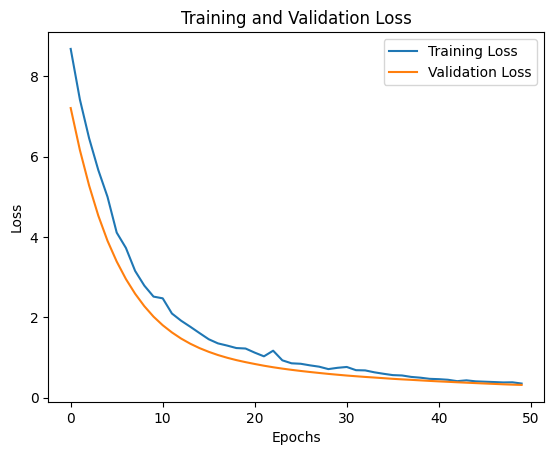

In [35]:
# Plot loss pada setiap epoch
plt.plot(history_bmj.history['loss'], label='Training Loss')
plt.plot(history_bmj.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


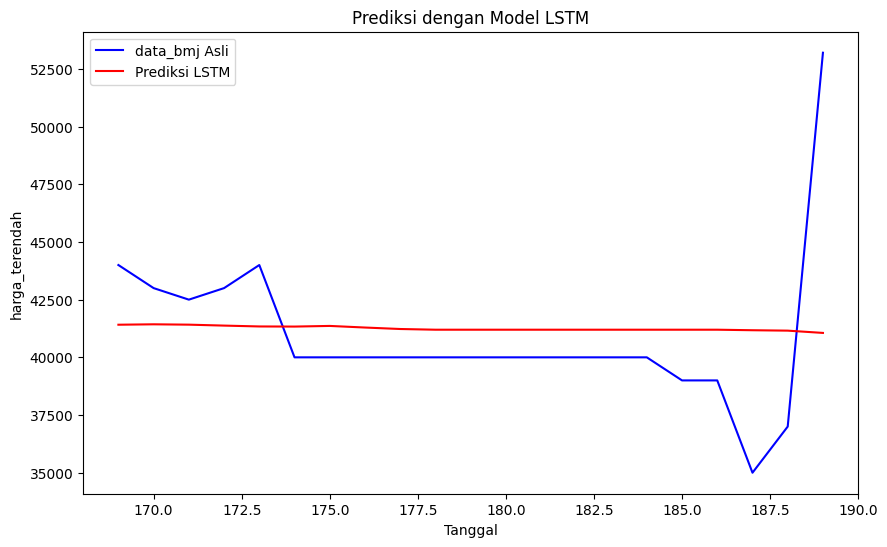

In [36]:
# Membuat prediksi dengan model LSTM
prediksi_bmj = model_bmj.predict(X_test_bmj)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_bmj = scaler.inverse_transform(np.concatenate((X_test_bmj[:, -1], prediksi_bmj.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_bmj.index[train_size + seq_length:], data_bmj['harga_terendah'].values[train_size + seq_length:], label='data_bmj Asli', color='blue')
plt.plot(data_bmj.index[train_size + seq_length:], prediksiLSTM_bmj, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [37]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_bmj = mean_absolute_percentage_error(data_bmj['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_bmj)
print('MAPE:', mapeLSTM_bmj)

MAPE: 0.05659994445194621


1/1 [==============================] - 0s 22ms/step
Prediksi untuk 7 hari ke depan: [[41058.246]
 [41124.742]
 [41203.68 ]
 [41252.875]
 [41255.91 ]
 [41257.457]
 [41257.926]]


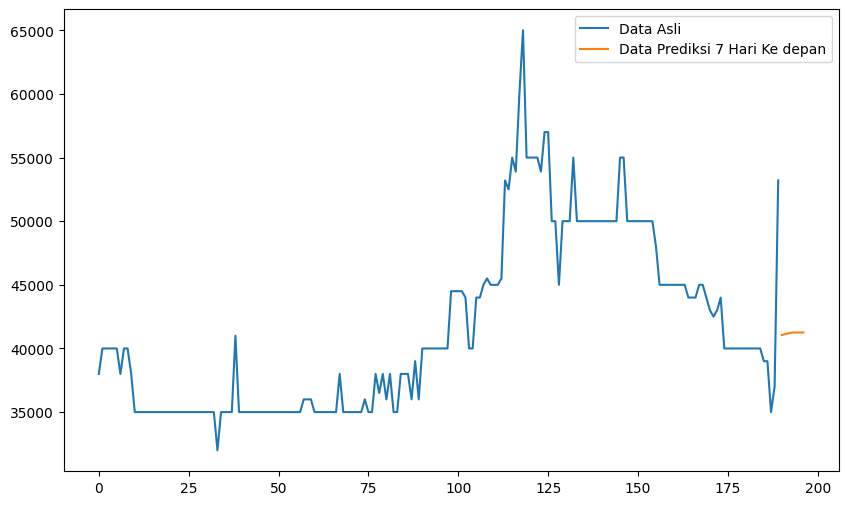

In [38]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_bmj = X_test_bmj[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_bmj = []
for i in range(future_steps):
    prediction = model_bmj.predict(future_data_bmj.reshape(1, seq_length - 1, 1))
    future_predictions_bmj.append(prediction[0, 0])
    future_data_bmj = np.append(future_data_bmj[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_bmj = scaler.inverse_transform(np.array(future_predictions_bmj).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_bmj)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_bmj)), scaler.inverse_transform(time_series_data_bmj), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_bmj), len(time_series_data_bmj) + future_steps), future_predictions_bmj, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [39]:
# @title Cabai Keriting Kota Bandung

ckb = pd.read_excel(url,sheet_name= 'Cabai Keriting Bandung')

print(ckb)

 # Memeriksa tipe data dari setiap kolom
print(ckb.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(ckb.head())

# Memeriksa jumlah data kosong dalam setiap kolom
ckb_missing_values = ckb.isnull().sum()
print(ckb)

# Memeriksa apakah ada data kosong secara keseluruhan
ckb_total_missing = ckb.isnull().sum().sum()
print(f"Total missing values: {ckb_total_missing}")
display(ckb)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
ckb['tanggal'] = pd.to_datetime(ckb['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(ckb.dtypes)
print(ckb['tanggal'].head())

# Memeriksa periode data
ckb_start_date = ckb['tanggal'].min()
ckb_end_date = ckb['tanggal'].max()

print(f"Periode data dari {ckb_start_date} hingga {ckb_end_date}")

from IPython.display import display
display(ckb)


# Menghapus kolom yang tidak diperlukan
data_ckb = ckb.drop(columns=['commodity','kategori_kota','komoditas_normalisasi']) # Use merged_df instead of df

print(ckb.head()) # Verify the changes
display(data_ckb)

       tanggal komoditas_normalisasi      commodity kategori_kota  \
0   2024-01-01  Cabai Merah Keriting  Curly Chilies       Bandung   
1   2024-01-02  Cabai Merah Keriting  Curly Chilies       Bandung   
2   2024-01-03  Cabai Merah Keriting  Curly Chilies       Bandung   
3   2024-01-04  Cabai Merah Keriting  Curly Chilies       Bandung   
4   2024-01-05  Cabai Merah Keriting  Curly Chilies       Bandung   
..         ...                   ...            ...           ...   
185 2024-07-04  Cabai Merah Keriting  Curly Chilies       Bandung   
186 2024-07-05  Cabai Merah Keriting  Curly Chilies       Bandung   
187 2024-07-06                   NaN            NaN           NaN   
188 2024-07-07                   NaN            NaN           NaN   
189 2024-07-08  Cabai Merah Keriting  Curly Chilies       Bandung   

     harga_rata_rata  harga_terendah  harga_tertinggi  
0       78333.330000    75000.000000     80000.000000  
1       93333.330000    80000.000000    100000.000000  
2  

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Merah Keriting,Curly Chilies,Bandung,78333.330000,75000.000000,80000.000000
1,2024-01-02,Cabai Merah Keriting,Curly Chilies,Bandung,93333.330000,80000.000000,100000.000000
2,2024-01-03,Cabai Merah Keriting,Curly Chilies,Bandung,93333.330000,80000.000000,100000.000000
3,2024-01-04,Cabai Merah Keriting,Curly Chilies,Bandung,93333.330000,80000.000000,100000.000000
4,2024-01-05,Cabai Merah Keriting,Curly Chilies,Bandung,95000.000000,85000.000000,100000.000000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Merah Keriting,Curly Chilies,Bandung,53333.330000,50000.000000,55000.000000
186,2024-07-05,Cabai Merah Keriting,Curly Chilies,Bandung,53333.330000,50000.000000,55000.000000
187,2024-07-06,NaN,NaN,NaN,65955.553333,63733.333333,67066.666667
188,2024-07-07,NaN,NaN,NaN,78577.776667,77466.666667,79133.333333


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                  float64
harga_tertinggi                 float64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-08 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Merah Keriting,Curly Chilies,Bandung,78333.330000,75000.000000,80000.000000
1,2024-01-02,Cabai Merah Keriting,Curly Chilies,Bandung,93333.330000,80000.000000,100000.000000
2,2024-01-03,Cabai Merah Keriting,Curly Chilies,Bandung,93333.330000,80000.000000,100000.000000
3,2024-01-04,Cabai Merah Keriting,Curly Chilies,Bandung,93333.330000,80000.000000,100000.000000
4,2024-01-05,Cabai Merah Keriting,Curly Chilies,Bandung,95000.000000,85000.000000,100000.000000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Merah Keriting,Curly Chilies,Bandung,53333.330000,50000.000000,55000.000000
186,2024-07-05,Cabai Merah Keriting,Curly Chilies,Bandung,53333.330000,50000.000000,55000.000000
187,2024-07-06,NaN,NaN,NaN,65955.553333,63733.333333,67066.666667
188,2024-07-07,NaN,NaN,NaN,78577.776667,77466.666667,79133.333333


     tanggal komoditas_normalisasi      commodity kategori_kota  \
0 2024-01-01  Cabai Merah Keriting  Curly Chilies       Bandung   
1 2024-01-02  Cabai Merah Keriting  Curly Chilies       Bandung   
2 2024-01-03  Cabai Merah Keriting  Curly Chilies       Bandung   
3 2024-01-04  Cabai Merah Keriting  Curly Chilies       Bandung   
4 2024-01-05  Cabai Merah Keriting  Curly Chilies       Bandung   

   harga_rata_rata  harga_terendah  harga_tertinggi  
0         78333.33         75000.0          80000.0  
1         93333.33         80000.0         100000.0  
2         93333.33         80000.0         100000.0  
3         93333.33         80000.0         100000.0  
4         95000.00         85000.0         100000.0  


,tanggal,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,78333.330000,75000.000000,80000.000000
1,2024-01-02,93333.330000,80000.000000,100000.000000
2,2024-01-03,93333.330000,80000.000000,100000.000000
3,2024-01-04,93333.330000,80000.000000,100000.000000
4,2024-01-05,95000.000000,85000.000000,100000.000000
...,...,...,...,...
185,2024-07-04,53333.330000,50000.000000,55000.000000
186,2024-07-05,53333.330000,50000.000000,55000.000000
187,2024-07-06,65955.553333,63733.333333,67066.666667
188,2024-07-07,78577.776667,77466.666667,79133.333333


Jumlah data_ckb latih: 165
Jumlah data_ckb uji: 25


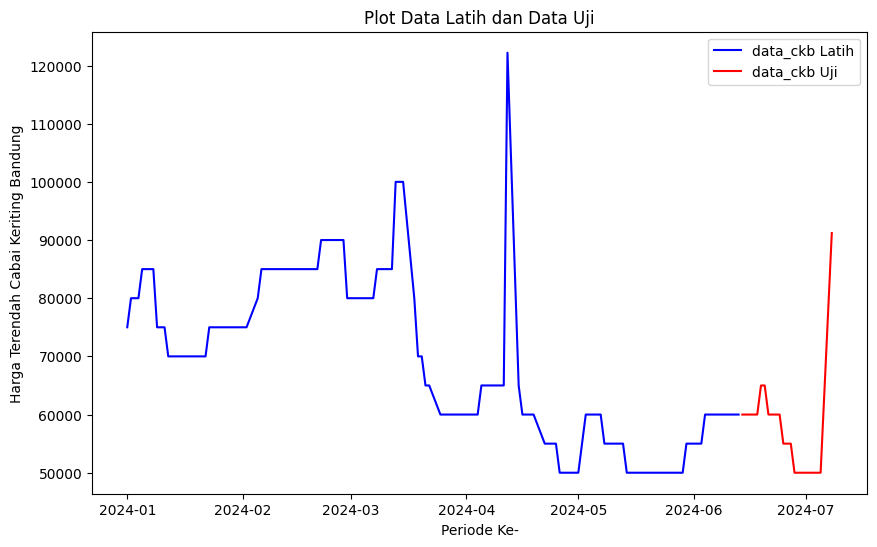

In [40]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_ckb = data_ckb.iloc[:165]  # Ambil 165 data_ckb pertama sebagai data_ckb latih
test_data_ckb = data_ckb.iloc[165:]   # Ambil 24 data_ckb sisanya sebagai data_ckb uji

# Menampilkan jumlah data_ckb dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_ckb latih:", len(train_data_ckb))
print("Jumlah data_ckb uji:", len(test_data_ckb))
# Membuat plot data_ckb latih dan data_ckb uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_ckb['tanggal'], train_data_ckb['harga_terendah'], label='data_ckb Latih', color='blue')
plt.plot(test_data_ckb['tanggal'], test_data_ckb['harga_terendah'], label='data_ckb Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah Cabai Keriting Bandung')
plt.legend()
plt.show()

In [41]:
# Mengambil kolom Cabai Keriting Bandung sebagai data yang akan diprediksi
time_series_data_ckb = data_ckb['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_ckb ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_ckb = scaler.fit_transform(time_series_data_ckb)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_ckb = len(time_series_data_ckb) - train_size

train_data_ckb = time_series_data_ckb[:train_size]
test_data_ckb = time_series_data_ckb[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_ckb, seq_length):
    sequences = []
    for i in range(len(data_ckb) - seq_length):
        sequences.append(data_ckb[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_ckb = create_sequences(train_data_ckb, seq_length)
X_test_ckb = create_sequences(test_data_ckb, seq_length)

# Memisahkan fitur dan target
y_train_ckb = X_train_ckb[:, -1]
X_train_ckb = X_train_ckb[:, :-1]
y_test_ckb = X_test_ckb[:, -1]
X_test_ckb = X_test_ckb[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_ckb = X_train_ckb.reshape(X_train_ckb.shape[0], X_train_ckb.shape[1], 1)
X_test_ckb = X_test_ckb.reshape(X_test_ckb.shape[0], X_test_ckb.shape[1], 1)

print("X_train_ckb shape:", X_train_ckb.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_ckb shape:", X_test_ckb.shape)    # Sama seperti di atas
print("y_train_ckb shape:", y_train_ckb.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_ckb shape:", y_test_ckb.shape)    # Sama seperti di atas

X_train_ckb shape: (161, 3, 1)
X_test_ckb shape: (21, 3, 1)
y_train_ckb shape: (161, 1)
y_test_ckb shape: (21, 1)


In [42]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_ckb = []

# Jumlah epoch yang akan diuji
epochs_to_test_ckb = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_ckb:
    history = model.fit(X_train_ckb, y_train_ckb, epochs=epoch, batch_size=16, validation_data=(X_test_ckb, y_test_ckb), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_ckb = model.predict(X_test_ckb)

    # Menghitung MSE
    mse_ckb = mean_squared_error(y_test_ckb, y_pred_ckb)

    # Menghitung AIC
    n_ckb = len(y_test_ckb)
    num_params_ckb = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_ckb)
    aic_ckb = calculate_aic(n_ckb, mse_ckb, num_params_ckb)

    # Menyimpan nilai AIC
    aic_values_ckb.append(aic_ckb)
    print(f"Epoch {epoch} - AIC: {aic_ckb} - MSE: {mse_ckb}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_ckb)



Epoch 1/5
11/11 [==============================] - 7s 117ms/step - loss: 9.0020 - val_loss: 7.2884
Epoch 2/5
11/11 [==============================] - 0s 17ms/step - loss: 7.4840 - val_loss: 6.2954
Epoch 3/5
11/11 [==============================] - 0s 17ms/step - loss: 6.5989 - val_loss: 5.4198
Epoch 4/5
11/11 [==============================] - 0s 17ms/step - loss: 5.7518 - val_loss: 4.6898
Epoch 5/5
1/1 [==============================] - 1s 1s/step
12
Epoch 5 - AIC: -48.42785508215674 - MSE: 0.031779130440254696
Epoch 1/10
11/11 [==============================] - 0s 24ms/step - loss: 4.2576 - val_loss: 3.5198
Epoch 2/10
11/11 [==============================] - 0s 18ms/step - loss: 3.7735 - val_loss: 3.0570
Epoch 3/10
11/11 [==============================] - 0s 18ms/step - loss: 3.2584 - val_loss: 2.6635
Epoch 4/10
11/11 [==============================] - 0s 21ms/step - loss: 3.0230 - val_loss: 2.3362
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 2.6029 - val_

In [43]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_ckb = Sequential()
model_ckb.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_ckb.add(BatchNormalization())
model_ckb.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_ckb.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_ckb.add(BatchNormalization())
model_ckb.add(Dropout(0.2))
model_ckb.add(Dense(1))
model_ckb.compile(optimizer='adam', loss='mse')
# Melatih model_ckb
history_ckb = model_ckb.fit(X_train_ckb, y_train_ckb, epochs=50, batch_size=16, validation_data=(X_test_ckb, y_test_ckb), verbose=1)

Epoch 1/50
11/11 [==============================] - 7s 141ms/step - loss: 9.0020 - val_loss: 7.2884
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 7.4840 - val_loss: 6.2954
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 6.5989 - val_loss: 5.4198
Epoch 4/50
11/11 [==============================] - 0s 15ms/step - loss: 5.7518 - val_loss: 4.6898
Epoch 5/50
11/11 [==============================] - 0s 13ms/step - loss: 4.9586 - val_loss: 4.0576
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 4.2533 - val_loss: 3.5224
Epoch 7/50
11/11 [==============================] - 0s 19ms/step - loss: 3.7516 - val_loss: 3.0748
Epoch 8/50
11/11 [==============================] - 0s 13ms/step - loss: 3.4178 - val_loss: 2.6871
Epoch 9/50
11/11 [==============================] - 0s 13ms/step - loss: 2.9085 - val_loss: 2.3576
Epoch 10/50
11/11 [==============================] - 0s 15ms/step - loss: 2.6334 - val_loss: 2.0735
Epoch 11

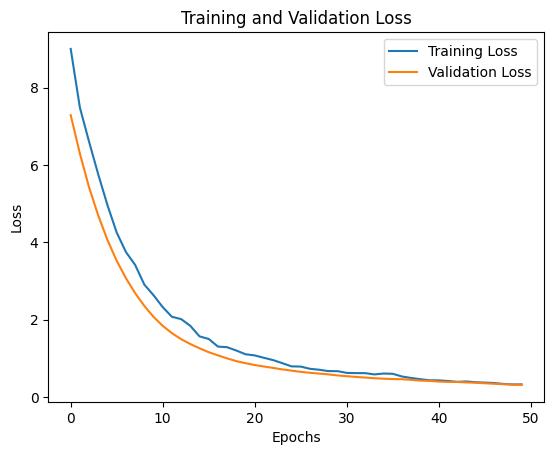

In [44]:
# Plot loss pada setiap epoch
plt.plot(history_ckb.history['loss'], label='Training Loss')
plt.plot(history_ckb.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 913ms/step


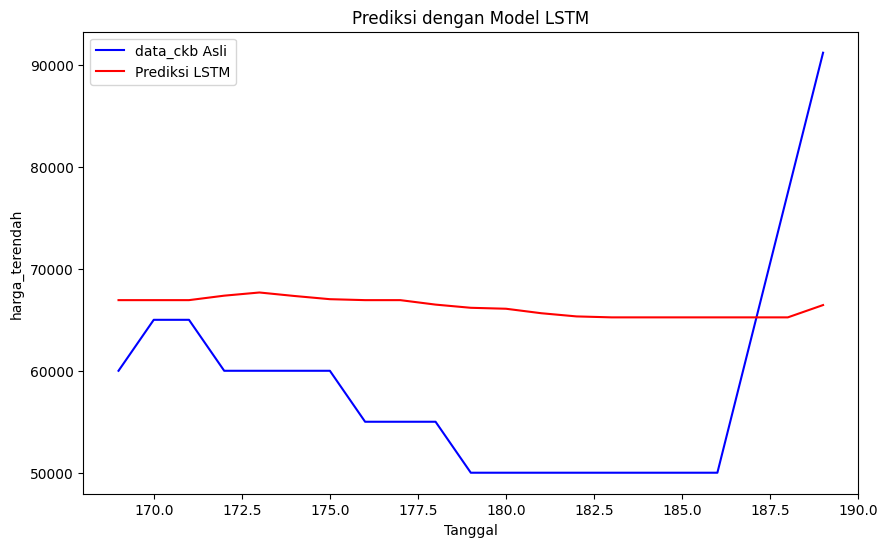

In [45]:
# Membuat prediksi dengan model LSTM
prediksi_ckb = model_ckb.predict(X_test_ckb)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_ckb = scaler.inverse_transform(np.concatenate((X_test_ckb[:, -1], prediksi_ckb.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_ckb.index[train_size + seq_length:], data_ckb['harga_terendah'].values[train_size + seq_length:], label='data_ckb Asli', color='blue')
plt.plot(data_ckb.index[train_size + seq_length:], prediksiLSTM_ckb, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [46]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_ckb = mean_absolute_percentage_error(data_ckb['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_ckb)
print('MAPE:', mapeLSTM_ckb)

MAPE: 0.2021236789106572


1/1 [==============================] - 0s 32ms/step
Prediksi untuk 7 hari ke depan: [[66447.234]
 [67541.48 ]
 [68061.484]
 [68225.51 ]
 [68292.54 ]
 [68318.27 ]
 [68327.74 ]]


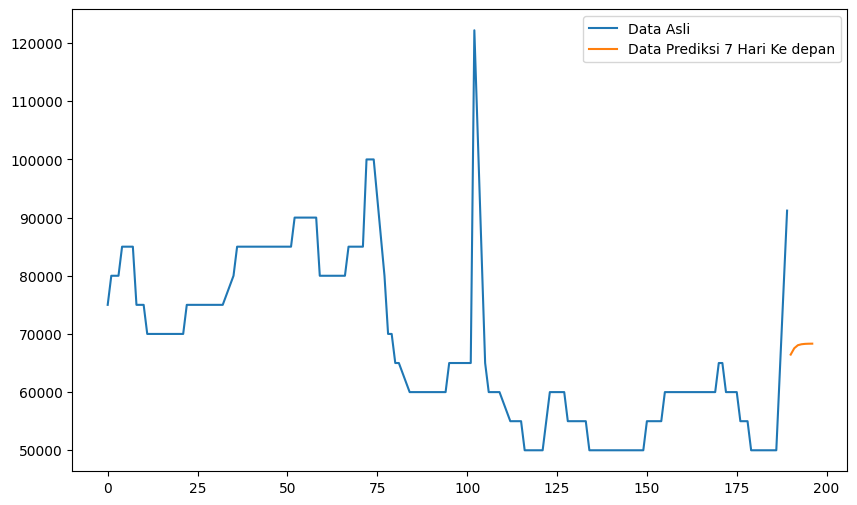

In [47]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_ckb = X_test_ckb[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_ckb = []
for i in range(future_steps):
    prediction = model_ckb.predict(future_data_ckb.reshape(1, seq_length - 1, 1))
    future_predictions_ckb.append(prediction[0, 0])
    future_data_ckb = np.append(future_data_ckb[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_ckb = scaler.inverse_transform(np.array(future_predictions_ckb).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_ckb)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_ckb)), scaler.inverse_transform(time_series_data_ckb), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_ckb), len(time_series_data_ckb) + future_steps), future_predictions_ckb, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [48]:
# @title Cabai Keriting Jabodetabek

ckj = pd.read_excel(url,sheet_name= 'Cabai Keriting Jabodetabek')

print(ckj)

 # Memeriksa tipe data dari setiap kolom
print(ckj.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(ckj.head())

# Memeriksa jumlah data kosong dalam setiap kolom
ckj_missing_values = ckj.isnull().sum()
print(ckj)

# Memeriksa apakah ada data kosong secara keseluruhan
ckj_total_missing = ckj.isnull().sum().sum()
print(f"Total missing values: {ckj_total_missing}")
display(ckj)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
ckj['tanggal'] = pd.to_datetime(ckj['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(ckj.dtypes)
print(ckj['tanggal'].head())

# Memeriksa periode data
ckj_start_date = ckj['tanggal'].min()
ckj_end_date = ckj['tanggal'].max()

print(f"Periode data dari {ckj_start_date} hingga {ckj_end_date}")

from IPython.display import display
display(ckj)


# Menghapus kolom yang tidak diperlukan
data_ckj = ckj.drop(columns=['commodity','kategori_kota','komoditas_normalisasi','harga_rata_rata','harga_tertinggi'])

print(ckj.head()) # Verify the changes
display(data_ckj)

       tanggal komoditas_normalisasi      commodity kategori_kota  \
0   2024-01-01  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
1   2024-01-02  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
2   2024-01-03  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
3   2024-01-04  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
4   2024-01-05  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
..         ...                   ...            ...           ...   
185 2024-07-04  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
186 2024-07-05  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
187 2024-07-06  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
188 2024-07-07  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
189 2024-07-08  Cabai Merah Keriting  Curly Chilies   Jabodetabek   

     harga_rata_rata  harga_terendah  harga_tertinggi  
0           72255.32           65000            80000  
1           75848.21           70000            80000  
2  

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Merah Keriting,Curly Chilies,Jabodetabek,72255.32,65000,80000
1,2024-01-02,Cabai Merah Keriting,Curly Chilies,Jabodetabek,75848.21,70000,80000
2,2024-01-03,Cabai Merah Keriting,Curly Chilies,Jabodetabek,76482.46,70000,80000
3,2024-01-04,Cabai Merah Keriting,Curly Chilies,Jabodetabek,76075.47,70000,80000
4,2024-01-05,Cabai Merah Keriting,Curly Chilies,Jabodetabek,75627.27,70000,80000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Merah Keriting,Curly Chilies,Jabodetabek,50337.50,43500,60000
186,2024-07-05,Cabai Merah Keriting,Curly Chilies,Jabodetabek,49869.05,45000,55000
187,2024-07-06,Cabai Merah Keriting,Curly Chilies,Jabodetabek,49444.44,45000,55000
188,2024-07-07,Cabai Merah Keriting,Curly Chilies,Jabodetabek,49233.33,45000,55000


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                    int64
harga_tertinggi                   int64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-08 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Merah Keriting,Curly Chilies,Jabodetabek,72255.32,65000,80000
1,2024-01-02,Cabai Merah Keriting,Curly Chilies,Jabodetabek,75848.21,70000,80000
2,2024-01-03,Cabai Merah Keriting,Curly Chilies,Jabodetabek,76482.46,70000,80000
3,2024-01-04,Cabai Merah Keriting,Curly Chilies,Jabodetabek,76075.47,70000,80000
4,2024-01-05,Cabai Merah Keriting,Curly Chilies,Jabodetabek,75627.27,70000,80000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Merah Keriting,Curly Chilies,Jabodetabek,50337.50,43500,60000
186,2024-07-05,Cabai Merah Keriting,Curly Chilies,Jabodetabek,49869.05,45000,55000
187,2024-07-06,Cabai Merah Keriting,Curly Chilies,Jabodetabek,49444.44,45000,55000
188,2024-07-07,Cabai Merah Keriting,Curly Chilies,Jabodetabek,49233.33,45000,55000


     tanggal komoditas_normalisasi      commodity kategori_kota  \
0 2024-01-01  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
1 2024-01-02  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
2 2024-01-03  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
3 2024-01-04  Cabai Merah Keriting  Curly Chilies   Jabodetabek   
4 2024-01-05  Cabai Merah Keriting  Curly Chilies   Jabodetabek   

   harga_rata_rata  harga_terendah  harga_tertinggi  
0         72255.32           65000            80000  
1         75848.21           70000            80000  
2         76482.46           70000            80000  
3         76075.47           70000            80000  
4         75627.27           70000            80000  


,tanggal,harga_terendah
0,2024-01-01,65000
1,2024-01-02,70000
2,2024-01-03,70000
3,2024-01-04,70000
4,2024-01-05,70000
...,...,...
185,2024-07-04,43500
186,2024-07-05,45000
187,2024-07-06,45000
188,2024-07-07,45000


Jumlah data_ckj latih: 165
Jumlah data_ckj uji: 25


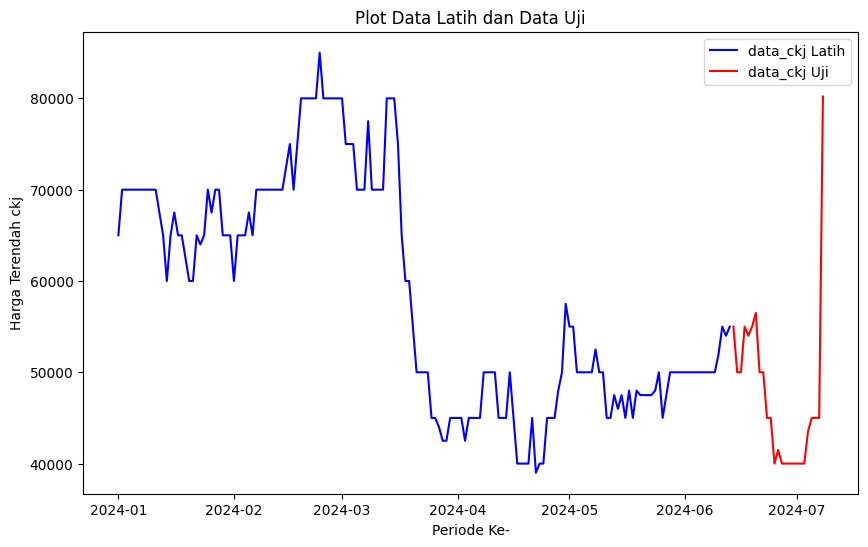

In [49]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_ckj = data_ckj.iloc[:165]  # Ambil 165 data_ckj pertama sebagai data_ckj latih
test_data_ckj = data_ckj.iloc[165:]   # Ambil 24 data_ckj sisanya sebagai data_ckj uji

# Menampilkan jumlah data_ckj dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_ckj latih:", len(train_data_ckj))
print("Jumlah data_ckj uji:", len(test_data_ckj))
# Membuat plot data_ckj latih dan data_ckj uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_ckj['tanggal'], train_data_ckj['harga_terendah'], label='data_ckj Latih', color='blue')
plt.plot(test_data_ckj['tanggal'], test_data_ckj['harga_terendah'], label='data_ckj Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah ckj')
plt.legend()
plt.show()

In [50]:
# Mengambil kolom ckj sebagai data yang akan diprediksi
time_series_data_ckj = data_ckj['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_ckj ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_ckj = scaler.fit_transform(time_series_data_ckj)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_ckj = len(time_series_data_ckj) - train_size

train_data_ckj = time_series_data_ckj[:train_size]
test_data_ckj = time_series_data_ckj[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_ckj, seq_length):
    sequences = []
    for i in range(len(data_ckj) - seq_length):
        sequences.append(data_ckj[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_ckj = create_sequences(train_data_ckj, seq_length)
X_test_ckj = create_sequences(test_data_ckj, seq_length)

# Memisahkan fitur dan target
y_train_ckj = X_train_ckj[:, -1]
X_train_ckj = X_train_ckj[:, :-1]
y_test_ckj = X_test_ckj[:, -1]
X_test_ckj = X_test_ckj[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_ckj = X_train_ckj.reshape(X_train_ckj.shape[0], X_train_ckj.shape[1], 1)
X_test_ckj = X_test_ckj.reshape(X_test_ckj.shape[0], X_test_ckj.shape[1], 1)

print("X_train_ckj shape:", X_train_ckj.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_ckj shape:", X_test_ckj.shape)    # Sama seperti di atas
print("y_train_ckj shape:", y_train_ckj.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_ckj shape:", y_test_ckj.shape)    # Sama seperti di atas

X_train_ckj shape: (161, 3, 1)
X_test_ckj shape: (21, 3, 1)
y_train_ckj shape: (161, 1)
y_test_ckj shape: (21, 1)


In [51]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_ckj = []

# Jumlah epoch yang akan diuji
epochs_to_test_ckj = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_ckj:
    history = model.fit(X_train_ckj, y_train_ckj, epochs=epoch, batch_size=16, validation_data=(X_test_ckj, y_test_ckj), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_ckj = model.predict(X_test_ckj)

    # Menghitung MSE
    mse_ckj = mean_squared_error(y_test_ckj, y_pred_ckj)

    # Menghitung AIC
    n_ckj = len(y_test_ckj)
    num_params_ckj = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_ckj)
    aic_ckj = calculate_aic(n_ckj, mse_ckj, num_params_ckj)

    # Menyimpan nilai AIC
    aic_values_ckj.append(aic_ckj)
    print(f"Epoch {epoch} - AIC: {aic_ckj} - MSE: {mse_ckj}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_ckj)



Epoch 1/5
11/11 [==============================] - 7s 163ms/step - loss: 9.1446 - val_loss: 7.2731
Epoch 2/5
11/11 [==============================] - 0s 19ms/step - loss: 7.7889 - val_loss: 6.2904
Epoch 3/5
11/11 [==============================] - 0s 18ms/step - loss: 6.6286 - val_loss: 5.4412
Epoch 4/5
11/11 [==============================] - 0s 17ms/step - loss: 5.8404 - val_loss: 4.7243
Epoch 5/5
1/1 [==============================] - 1s 988ms/step
12
Epoch 5 - AIC: -38.50195403629044 - MSE: 0.05098195534973096
Epoch 1/10
11/11 [==============================] - 0s 18ms/step - loss: 4.3189 - val_loss: 3.6127
Epoch 2/10
11/11 [==============================] - 0s 13ms/step - loss: 3.9183 - val_loss: 3.1748
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 3.4156 - val_loss: 2.7955
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 3.1427 - val_loss: 2.4720
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 2.7979 - va

In [52]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_ckj = Sequential()
model_ckj.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_ckj.add(BatchNormalization())
model_ckj.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_ckj.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_ckj.add(BatchNormalization())
model_ckj.add(Dropout(0.2))
model_ckj.add(Dense(1))
model_ckj.compile(optimizer='adam', loss='mse')
# Melatih model_ckj
history_ckj = model_ckj.fit(X_train_ckj, y_train_ckj, epochs=50, batch_size=16, validation_data=(X_test_ckj, y_test_ckj), verbose=1)

Epoch 1/50
11/11 [==============================] - 6s 130ms/step - loss: 9.1446 - val_loss: 7.2731
Epoch 2/50
11/11 [==============================] - 0s 15ms/step - loss: 7.7889 - val_loss: 6.2904
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 6.6286 - val_loss: 5.4412
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 5.8404 - val_loss: 4.7243
Epoch 5/50
11/11 [==============================] - 0s 18ms/step - loss: 5.1687 - val_loss: 4.1224
Epoch 6/50
11/11 [==============================] - 0s 15ms/step - loss: 4.3764 - val_loss: 3.6141
Epoch 7/50
11/11 [==============================] - 0s 15ms/step - loss: 3.8799 - val_loss: 3.1723
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 3.5399 - val_loss: 2.8002
Epoch 9/50
11/11 [==============================] - 0s 17ms/step - loss: 3.0355 - val_loss: 2.4811
Epoch 10/50
11/11 [==============================] - 0s 19ms/step - loss: 2.7847 - val_loss: 2.1966
Epoch 11

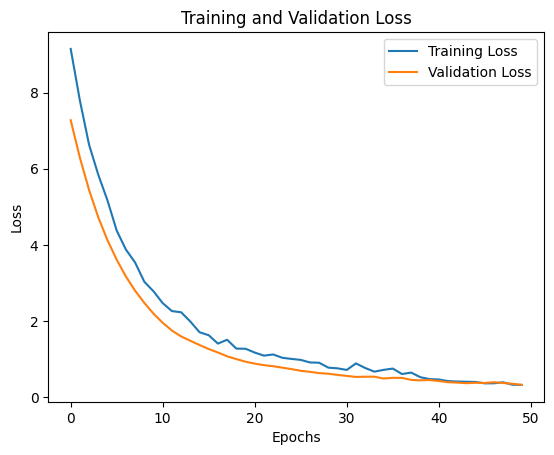

In [53]:
# Plot loss pada setiap epoch
plt.plot(history_ckj.history['loss'], label='Training Loss')
plt.plot(history_ckj.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 2s 2s/step


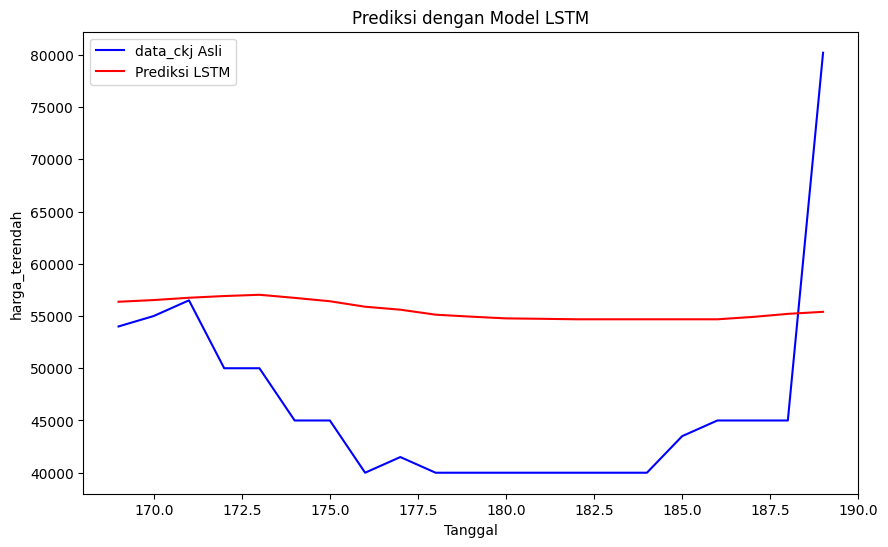

In [54]:
# Membuat prediksi dengan model LSTM
prediksi_ckj = model_ckj.predict(X_test_ckj)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_ckj = scaler.inverse_transform(np.concatenate((X_test_ckj[:, -1], prediksi_ckj.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_ckj.index[train_size + seq_length:], data_ckj['harga_terendah'].values[train_size + seq_length:], label='data_ckj Asli', color='blue')
plt.plot(data_ckj.index[train_size + seq_length:], prediksiLSTM_ckj, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [55]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_ckj = mean_absolute_percentage_error(data_ckj['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_ckj)
print('MAPE:', mapeLSTM_ckj)

MAPE: 0.2583612432339919


1/1 [==============================] - 0s 24ms/step
Prediksi untuk 7 hari ke depan: [[55400.09 ]
 [56110.242]
 [56746.688]
 [57155.004]
 [57239.527]
 [57288.18 ]
 [57308.95 ]]


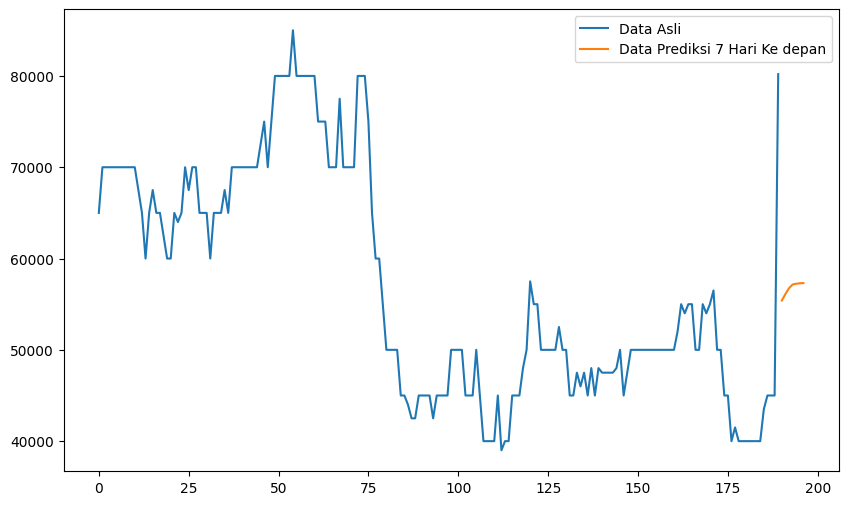

In [56]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_ckj = X_test_ckj[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_ckj = []
for i in range(future_steps):
    prediction = model_ckj.predict(future_data_ckj.reshape(1, seq_length - 1, 1))
    future_predictions_ckj.append(prediction[0, 0])
    future_data_ckj = np.append(future_data_ckj[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_ckj = scaler.inverse_transform(np.array(future_predictions_ckj).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_ckj)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_ckj)), scaler.inverse_transform(time_series_data_ckj), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_ckj), len(time_series_data_ckj) + future_steps), future_predictions_ckj, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [57]:
# @title Cabai Rawit Jabodetabek

crj = pd.read_excel(url,sheet_name= 'Cabai Rawit Jabodetabek')

print(crj)

 # Memeriksa tipe data dari setiap kolom
print(crj.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(crj.head())

# Memeriksa jumlah data kosong dalam setiap kolom
crj_missing_values = crj.isnull().sum()
print(crj)

# Memeriksa apakah ada data kosong secara keseluruhan
crj_total_missing = crj.isnull().sum().sum()
print(f"Total missing values: {crj_total_missing}")
display(crj)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
crj['tanggal'] = pd.to_datetime(crj['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(crj.dtypes)
print(crj['tanggal'].head())

# Memeriksa periode data
crj_start_date = crj['tanggal'].min()
crj_end_date = crj['tanggal'].max()

print(f"Periode data dari {crj_start_date} hingga {crj_end_date}")

from IPython.display import display
display(crj)


# Menghapus kolom yang tidak diperlukan
data_crj = crj.drop(columns=['commodity','kategori_kota','komoditas_normalisasi','harga_rata_rata','harga_tertinggi'])

print(crj.head()) # Verify the changes
display(data_crj)

       tanggal komoditas_normalisasi    commodity kategori_kota  \
0   2024-01-01     Cabai Rawit Merah  Red Chilies   Jabodetabek   
1   2024-01-02     Cabai Rawit Merah  Red Chilies   Jabodetabek   
2   2024-01-03     Cabai Rawit Merah  Red Chilies   Jabodetabek   
3   2024-01-04     Cabai Rawit Merah  Red Chilies   Jabodetabek   
4   2024-01-05     Cabai Rawit Merah  Red Chilies   Jabodetabek   
..         ...                   ...          ...           ...   
185 2024-07-04     Cabai Rawit Merah  Red Chilies   Jabodetabek   
186 2024-07-05     Cabai Rawit Merah  Red Chilies   Jabodetabek   
187 2024-07-06     Cabai Rawit Merah  Red Chilies   Jabodetabek   
188 2024-07-07     Cabai Rawit Merah  Red Chilies   Jabodetabek   
189 2024-07-08     Cabai Rawit Merah  Red Chilies   Jabodetabek   

     harga_rata_rata  harga_terendah  harga_tertinggi  
0           91776.60           85000           100000  
1           94107.14           90000           100000  
2           94122.81       

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Rawit Merah,Red Chilies,Jabodetabek,91776.60,85000,100000
1,2024-01-02,Cabai Rawit Merah,Red Chilies,Jabodetabek,94107.14,90000,100000
2,2024-01-03,Cabai Rawit Merah,Red Chilies,Jabodetabek,94122.81,90000,100000
3,2024-01-04,Cabai Rawit Merah,Red Chilies,Jabodetabek,93981.48,90000,100000
4,2024-01-05,Cabai Rawit Merah,Red Chilies,Jabodetabek,91318.18,82500,100000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Rawit Merah,Red Chilies,Jabodetabek,50150.00,45000,55000
186,2024-07-05,Cabai Rawit Merah,Red Chilies,Jabodetabek,51928.57,50000,55000
187,2024-07-06,Cabai Rawit Merah,Red Chilies,Jabodetabek,50185.19,45000,55000
188,2024-07-07,Cabai Rawit Merah,Red Chilies,Jabodetabek,50166.67,45000,55000


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                    int64
harga_tertinggi                   int64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-08 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Rawit Merah,Red Chilies,Jabodetabek,91776.60,85000,100000
1,2024-01-02,Cabai Rawit Merah,Red Chilies,Jabodetabek,94107.14,90000,100000
2,2024-01-03,Cabai Rawit Merah,Red Chilies,Jabodetabek,94122.81,90000,100000
3,2024-01-04,Cabai Rawit Merah,Red Chilies,Jabodetabek,93981.48,90000,100000
4,2024-01-05,Cabai Rawit Merah,Red Chilies,Jabodetabek,91318.18,82500,100000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Rawit Merah,Red Chilies,Jabodetabek,50150.00,45000,55000
186,2024-07-05,Cabai Rawit Merah,Red Chilies,Jabodetabek,51928.57,50000,55000
187,2024-07-06,Cabai Rawit Merah,Red Chilies,Jabodetabek,50185.19,45000,55000
188,2024-07-07,Cabai Rawit Merah,Red Chilies,Jabodetabek,50166.67,45000,55000


     tanggal komoditas_normalisasi    commodity kategori_kota  \
0 2024-01-01     Cabai Rawit Merah  Red Chilies   Jabodetabek   
1 2024-01-02     Cabai Rawit Merah  Red Chilies   Jabodetabek   
2 2024-01-03     Cabai Rawit Merah  Red Chilies   Jabodetabek   
3 2024-01-04     Cabai Rawit Merah  Red Chilies   Jabodetabek   
4 2024-01-05     Cabai Rawit Merah  Red Chilies   Jabodetabek   

   harga_rata_rata  harga_terendah  harga_tertinggi  
0         91776.60           85000           100000  
1         94107.14           90000           100000  
2         94122.81           90000           100000  
3         93981.48           90000           100000  
4         91318.18           82500           100000  


,tanggal,harga_terendah
0,2024-01-01,85000
1,2024-01-02,90000
2,2024-01-03,90000
3,2024-01-04,90000
4,2024-01-05,82500
...,...,...
185,2024-07-04,45000
186,2024-07-05,50000
187,2024-07-06,45000
188,2024-07-07,45000


Jumlah data_crj latih: 165
Jumlah data_crj uji: 25


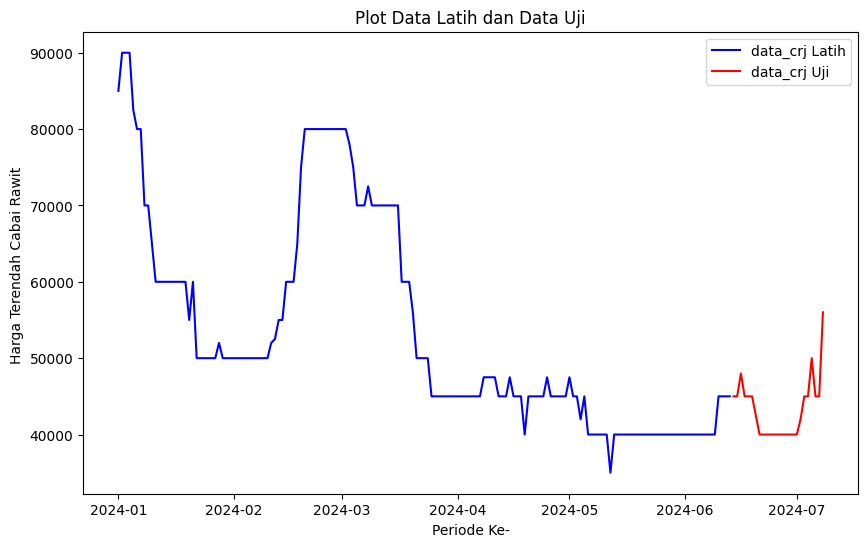

In [58]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_crj = data_crj.iloc[:165]  # Ambil 165 data_crj pertama sebagai data_crj latih
test_data_crj = data_crj.iloc[165:]   # Ambil 24 data_crj sisanya sebagai data_crj uji

# Menampilkan jumlah data_crj dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_crj latih:", len(train_data_crj))
print("Jumlah data_crj uji:", len(test_data_crj))
# Membuat plot data_crj latih dan data_crj uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_crj['tanggal'], train_data_crj['harga_terendah'], label='data_crj Latih', color='blue')
plt.plot(test_data_crj['tanggal'], test_data_crj['harga_terendah'], label='data_crj Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah Cabai Rawit ')
plt.legend()
plt.show()

In [59]:
# Mengambil kolom crj sebagai data yang akan diprediksi
time_series_data_crj = data_crj['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_crj ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_crj = scaler.fit_transform(time_series_data_crj)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_crj = len(time_series_data_crj) - train_size

train_data_crj = time_series_data_crj[:train_size]
test_data_crj = time_series_data_crj[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_crj, seq_length):
    sequences = []
    for i in range(len(data_crj) - seq_length):
        sequences.append(data_crj[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_crj = create_sequences(train_data_crj, seq_length)
X_test_crj = create_sequences(test_data_crj, seq_length)

# Memisahkan fitur dan target
y_train_crj = X_train_crj[:, -1]
X_train_crj = X_train_crj[:, :-1]
y_test_crj = X_test_crj[:, -1]
X_test_crj = X_test_crj[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_crj = X_train_crj.reshape(X_train_crj.shape[0], X_train_crj.shape[1], 1)
X_test_crj = X_test_crj.reshape(X_test_crj.shape[0], X_test_crj.shape[1], 1)

print("X_train_crj shape:", X_train_crj.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_crj shape:", X_test_crj.shape)    # Sama seperti di atas
print("y_train_crj shape:", y_train_crj.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_crj shape:", y_test_crj.shape)    # Sama seperti di atas

X_train_crj shape: (161, 3, 1)
X_test_crj shape: (21, 3, 1)
y_train_crj shape: (161, 1)
y_test_crj shape: (21, 1)


In [60]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_crj = []

# Jumlah epoch yang akan diuji
epochs_to_test_crj = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_crj:
    history = model.fit(X_train_crj, y_train_crj, epochs=epoch, batch_size=16, validation_data=(X_test_crj, y_test_crj), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_crj = model.predict(X_test_crj)

    # Menghitung MSE
    mse_crj = mean_squared_error(y_test_crj, y_pred_crj)

    # Menghitung AIC
    n_crj = len(y_test_crj)
    num_params_crj = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_crj)
    aic_crj = calculate_aic(n_crj, mse_crj, num_params_crj)

    # Menyimpan nilai AIC
    aic_values_crj.append(aic_crj)
    print(f"Epoch {epoch} - AIC: {aic_crj} - MSE: {mse_crj}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_crj)



Epoch 1/5
11/11 [==============================] - 7s 114ms/step - loss: 9.0168 - val_loss: 7.2729
Epoch 2/5
11/11 [==============================] - 0s 10ms/step - loss: 7.7676 - val_loss: 6.3114
Epoch 3/5
11/11 [==============================] - 0s 12ms/step - loss: 6.5511 - val_loss: 5.4898
Epoch 4/5
11/11 [==============================] - 0s 12ms/step - loss: 5.8898 - val_loss: 4.7872
Epoch 5/5
1/1 [==============================] - 1s 915ms/step
12
Epoch 5 - AIC: -53.26237733767569 - MSE: 0.025244150193576488
Epoch 1/10
11/11 [==============================] - 0s 16ms/step - loss: 4.5276 - val_loss: 3.6691
Epoch 2/10
11/11 [==============================] - 0s 13ms/step - loss: 4.0431 - val_loss: 3.2278
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 3.5515 - val_loss: 2.8453
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: 3.1801 - val_loss: 2.5201
Epoch 5/10
11/11 [==============================] - 0s 13ms/step - loss: 2.8329 - v

In [61]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_crj = Sequential()
model_crj.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_crj.add(BatchNormalization())
model_crj.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_crj.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_crj.add(BatchNormalization())
model_crj.add(Dropout(0.2))
model_crj.add(Dense(1))
model_crj.compile(optimizer='adam', loss='mse')
# Melatih model_crj
history_crj = model_crj.fit(X_train_crj, y_train_crj, epochs=50, batch_size=16, validation_data=(X_test_crj, y_test_crj), verbose=1)

Epoch 1/50
11/11 [==============================] - 6s 125ms/step - loss: 9.0168 - val_loss: 7.2729
Epoch 2/50
11/11 [==============================] - 0s 18ms/step - loss: 7.7676 - val_loss: 6.3114
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 6.5511 - val_loss: 5.4898
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 5.8898 - val_loss: 4.7872
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 5.1067 - val_loss: 4.1837
Epoch 6/50
11/11 [==============================] - 0s 14ms/step - loss: 4.5135 - val_loss: 3.6680
Epoch 7/50
11/11 [==============================] - 0s 14ms/step - loss: 3.8969 - val_loss: 3.2215
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 3.5503 - val_loss: 2.8432
Epoch 9/50
11/11 [==============================] - 0s 18ms/step - loss: 3.0647 - val_loss: 2.5172
Epoch 10/50
11/11 [==============================] - 0s 16ms/step - loss: 2.8939 - val_loss: 2.2326
Epoch 11

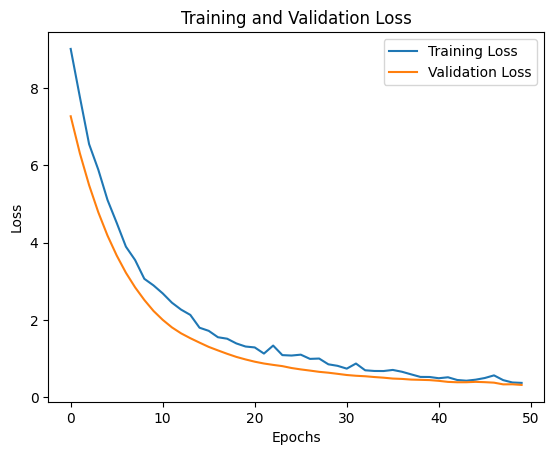

In [62]:
# Plot loss pada setiap epoch
plt.plot(history_crj.history['loss'], label='Training Loss')
plt.plot(history_crj.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 914ms/step


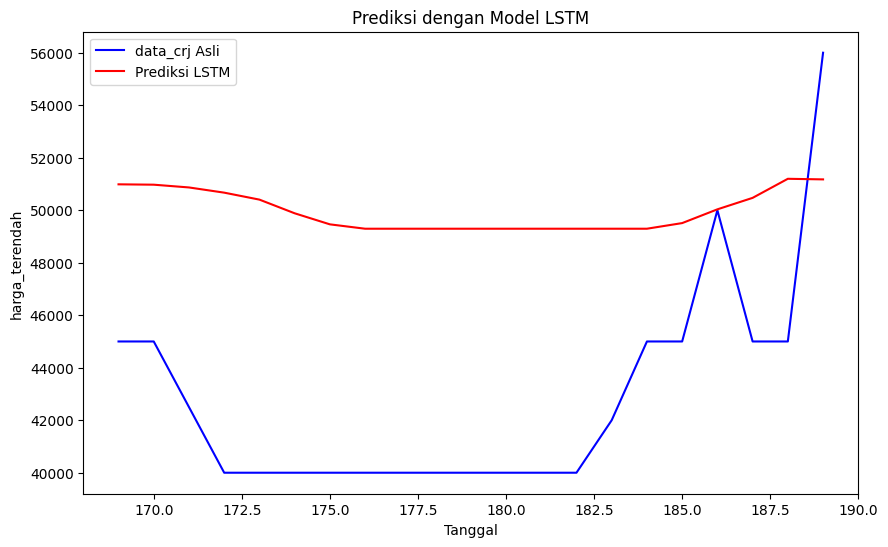

In [63]:
# Membuat prediksi dengan model LSTM
prediksi_crj = model_crj.predict(X_test_crj)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_crj = scaler.inverse_transform(np.concatenate((X_test_crj[:, -1], prediksi_crj.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_crj.index[train_size + seq_length:], data_crj['harga_terendah'].values[train_size + seq_length:], label='data_crj Asli', color='blue')
plt.plot(data_crj.index[train_size + seq_length:], prediksiLSTM_crj, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [64]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_crj = mean_absolute_percentage_error(data_crj['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_crj)
print('MAPE:', mapeLSTM_crj)

MAPE: 0.1816803894434834


1/1 [==============================] - 0s 23ms/step
Prediksi untuk 7 hari ke depan: [[51174.5  ]
 [51650.02 ]
 [51991.195]
 [52479.2  ]
 [52595.207]
 [52678.31 ]
 [52730.426]]


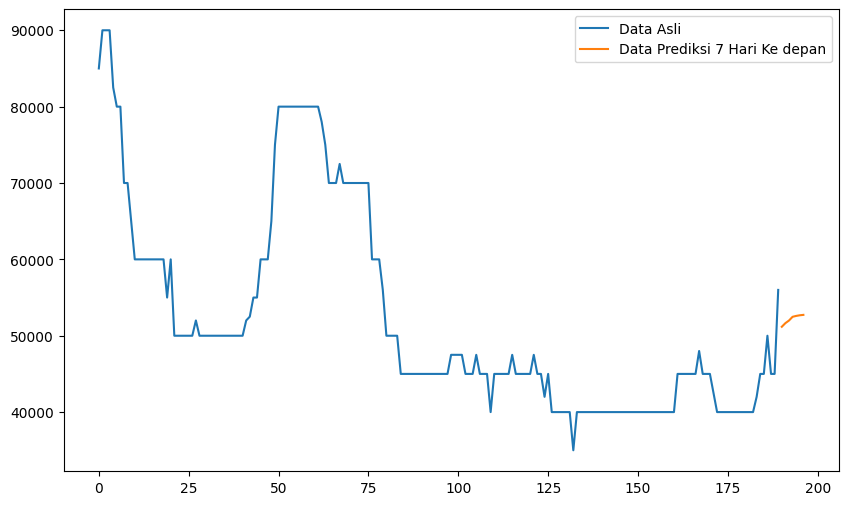

In [65]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_crj = X_test_crj[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_crj = []
for i in range(future_steps):
    prediction = model_crj.predict(future_data_crj.reshape(1, seq_length - 1, 1))
    future_predictions_crj.append(prediction[0, 0])
    future_data_crj = np.append(future_data_crj[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_crj = scaler.inverse_transform(np.array(future_predictions_crj).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_crj)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_crj)), scaler.inverse_transform(time_series_data_crj), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_crj), len(time_series_data_crj) + future_steps), future_predictions_crj, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [66]:
# @title Cabai Rawit Bandung

crb = pd.read_excel(url,sheet_name= 'Cabai Rawit Bandung')

print(crb)

 # Memeriksa tipe data dari setiap kolom
print(crb.dtypes)

# Membaca beberapa baris pertama dari DataFrame
print(crb.head())

# Memeriksa jumlah data kosong dalam setiap kolom
crb_missing_values = crb.isnull().sum()
print(crb)

# Memeriksa apakah ada data kosong secara keseluruhan
crb_total_missing = crb.isnull().sum().sum()
print(f"Total missing values: {crb_total_missing}")
display(crb)

# Menyesuiakan tipe data
# Mengonversi kolom yang berisi data tanggal menjadi format datetime
# Ganti 'Date' dengan nama kolom yang ingin Anda konversi
crb['tanggal'] = pd.to_datetime(crb['tanggal'], errors='coerce')
# Memeriksa apakah konversi berhasil
print(crb.dtypes)
print(crb['tanggal'].head())

# Memeriksa periode data
crb_start_date = crb['tanggal'].min()
crb_end_date = crb['tanggal'].max()

print(f"Periode data dari {crb_start_date} hingga {crb_end_date}")

from IPython.display import display
display(crb)


# Menghapus kolom yang tidak diperlukan
data_crb = crb.drop(columns=['commodity','kategori_kota','komoditas_normalisasi','harga_rata_rata','harga_tertinggi'])

print(crb.head()) # Verify the changes
display(data_crb)

       tanggal komoditas_normalisasi    commodity kategori_kota  \
0   2024-01-01     Cabai Rawit Merah  Red Chilies       Bandung   
1   2024-01-02     Cabai Rawit Merah  Red Chilies       Bandung   
2   2024-01-03     Cabai Rawit Merah  Red Chilies       Bandung   
3   2024-01-04     Cabai Rawit Merah  Red Chilies       Bandung   
4   2024-01-05     Cabai Rawit Merah  Red Chilies       Bandung   
..         ...                   ...          ...           ...   
185 2024-07-04     Cabai Rawit Merah  Red Chilies       Bandung   
186 2024-07-05     Cabai Rawit Merah  Red Chilies       Bandung   
187 2024-07-06                   NaN          NaN           NaN   
188 2024-07-07                   NaN          NaN           NaN   
189 2024-07-08     Cabai Rawit Merah  Red Chilies       Bandung   

     harga_rata_rata  harga_terendah  harga_tertinggi  
0       93333.330000    90000.000000     95000.000000  
1       98333.330000    95000.000000    100000.000000  
2       98333.330000    950

,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Rawit Merah,Red Chilies,Bandung,93333.330000,90000.000000,95000.000000
1,2024-01-02,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
2,2024-01-03,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
3,2024-01-04,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
4,2024-01-05,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Rawit Merah,Red Chilies,Bandung,53333.330000,50000.000000,55000.000000
186,2024-07-05,Cabai Rawit Merah,Red Chilies,Bandung,58333.330000,55000.000000,60000.000000
187,2024-07-06,NaN,NaN,NaN,60955.553333,58733.333333,62066.666667
188,2024-07-07,NaN,NaN,NaN,63577.776667,62466.666667,64133.333333


tanggal                  datetime64[ns]
komoditas_normalisasi            object
commodity                        object
kategori_kota                    object
harga_rata_rata                 float64
harga_terendah                  float64
harga_tertinggi                 float64
dtype: object
0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: tanggal, dtype: datetime64[ns]
Periode data dari 2024-01-01 00:00:00 hingga 2024-07-08 00:00:00


,tanggal,komoditas_normalisasi,commodity,kategori_kota,harga_rata_rata,harga_terendah,harga_tertinggi
0,2024-01-01,Cabai Rawit Merah,Red Chilies,Bandung,93333.330000,90000.000000,95000.000000
1,2024-01-02,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
2,2024-01-03,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
3,2024-01-04,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
4,2024-01-05,Cabai Rawit Merah,Red Chilies,Bandung,98333.330000,95000.000000,100000.000000
...,...,...,...,...,...,...,...
185,2024-07-04,Cabai Rawit Merah,Red Chilies,Bandung,53333.330000,50000.000000,55000.000000
186,2024-07-05,Cabai Rawit Merah,Red Chilies,Bandung,58333.330000,55000.000000,60000.000000
187,2024-07-06,NaN,NaN,NaN,60955.553333,58733.333333,62066.666667
188,2024-07-07,NaN,NaN,NaN,63577.776667,62466.666667,64133.333333


     tanggal komoditas_normalisasi    commodity kategori_kota  \
0 2024-01-01     Cabai Rawit Merah  Red Chilies       Bandung   
1 2024-01-02     Cabai Rawit Merah  Red Chilies       Bandung   
2 2024-01-03     Cabai Rawit Merah  Red Chilies       Bandung   
3 2024-01-04     Cabai Rawit Merah  Red Chilies       Bandung   
4 2024-01-05     Cabai Rawit Merah  Red Chilies       Bandung   

   harga_rata_rata  harga_terendah  harga_tertinggi  
0         93333.33         90000.0          95000.0  
1         98333.33         95000.0         100000.0  
2         98333.33         95000.0         100000.0  
3         98333.33         95000.0         100000.0  
4         98333.33         95000.0         100000.0  


,tanggal,harga_terendah
0,2024-01-01,90000.000000
1,2024-01-02,95000.000000
2,2024-01-03,95000.000000
3,2024-01-04,95000.000000
4,2024-01-05,95000.000000
...,...,...
185,2024-07-04,50000.000000
186,2024-07-05,55000.000000
187,2024-07-06,58733.333333
188,2024-07-07,62466.666667


Jumlah data_crb latih: 165
Jumlah data_crb uji: 25


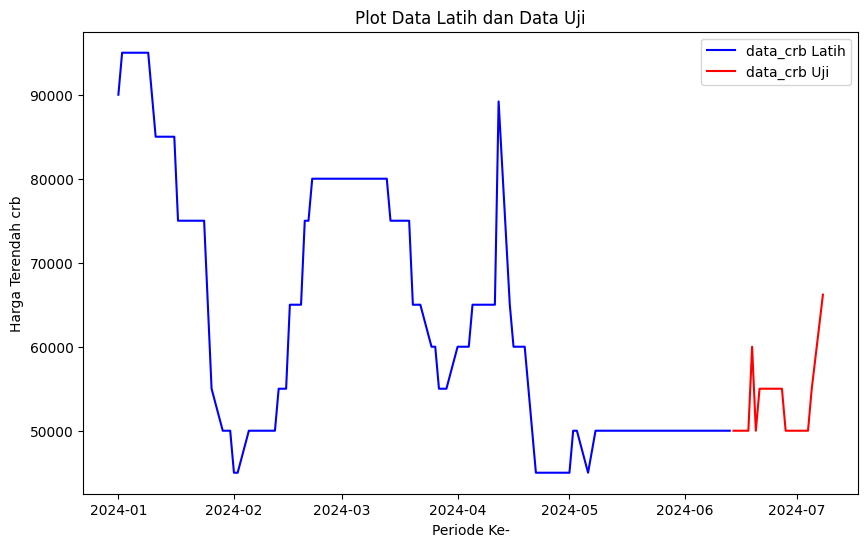

In [67]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data_crb = data_crb.iloc[:165]  # Ambil 165 data_crb pertama sebagai data_crb latih
test_data_crb = data_crb.iloc[165:]   # Ambil 24 data_crb sisanya sebagai data_crb uji

# Menampilkan jumlah data_crb dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data_crb latih:", len(train_data_crb))
print("Jumlah data_crb uji:", len(test_data_crb))
# Membuat plot data_crb latih dan data_crb uji
plt.figure(figsize=(10, 6))
plt.plot(train_data_crb['tanggal'], train_data_crb['harga_terendah'], label='data_crb Latih', color='blue')
plt.plot(test_data_crb['tanggal'], test_data_crb['harga_terendah'], label='data_crb Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Periode Ke-')
plt.ylabel('Harga Terendah crb')
plt.legend()
plt.show()

In [68]:
# Mengambil kolom crb sebagai data yang akan diprediksi
time_series_data_crb = data_crb['harga_terendah'].values.reshape(-1, 1)

# Normalisasi data_crb ke rentang 0-1
scaler = MinMaxScaler()
time_series_data_crb = scaler.fit_transform(time_series_data_crb)

# Membagi dataset menjadi data latih dan data uji
train_size = 165
test_size_crb = len(time_series_data_crb) - train_size

train_data_crb = time_series_data_crb[:train_size]
test_data_crb = time_series_data_crb[train_size:]

# Membuat dataset dengan sekuens deret waktu
def create_sequences(data_crb, seq_length):
    sequences = []
    for i in range(len(data_crb) - seq_length):
        sequences.append(data_crb[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 4

# Membuat dataset dengan sekuens deret waktu
X_train_crb = create_sequences(train_data_crb, seq_length)
X_test_crb = create_sequences(test_data_crb, seq_length)

# Memisahkan fitur dan target
y_train_crb = X_train_crb[:, -1]
X_train_crb = X_train_crb[:, :-1]
y_test_crb = X_test_crb[:, -1]
X_test_crb = X_test_crb[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train_crb = X_train_crb.reshape(X_train_crb.shape[0], X_train_crb.shape[1], 1)
X_test_crb = X_test_crb.reshape(X_test_crb.shape[0], X_test_crb.shape[1], 1)

print("X_train_crb shape:", X_train_crb.shape)  # Harus berbentuk (jumlah sampel, seq_length-1, 1)
print("X_test_crb shape:", X_test_crb.shape)    # Sama seperti di atas
print("y_train_crb shape:", y_train_crb.shape)  # Harus berbentuk (jumlah sampel,)
print("y_test_crb shape:", y_test_crb.shape)    # Sama seperti di atas

X_train_crb shape: (161, 3, 1)
X_test_crb shape: (21, 3, 1)
y_train_crb shape: (161, 1)
y_test_crb shape: (21, 1)


In [69]:
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)

# Fungsi untuk membuat model LSTM

def create_model():
    model = Sequential()
    model.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    # Tambahkan layer LSTM kedua
    model.add(LSTM(50, kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic


# Inisialisasi model
model = create_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values_crb = []

# Jumlah epoch yang akan diuji
epochs_to_test_crb = [5, 10, 50, 100, 150, 200]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test_crb:
    history = model.fit(X_train_crb, y_train_crb, epochs=epoch, batch_size=16, validation_data=(X_test_crb, y_test_crb), callbacks=[early_stopping], verbose=1)

    # Prediksi dengan model
    y_pred_crb = model.predict(X_test_crb)

    # Menghitung MSE
    mse_crb = mean_squared_error(y_test_crb, y_pred_crb)

    # Menghitung AIC
    n_crb = len(y_test_crb)
    num_params_crb = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    print(num_params_crb)
    aic_crb = calculate_aic(n_crb, mse_crb, num_params_crb)

    # Menyimpan nilai AIC
    aic_values_crb.append(aic_crb)
    print(f"Epoch {epoch} - AIC: {aic_crb} - MSE: {mse_crb}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values_crb)



Epoch 1/5
11/11 [==============================] - 7s 112ms/step - loss: 8.9227 - val_loss: 7.2226
Epoch 2/5
11/11 [==============================] - 0s 14ms/step - loss: 7.6899 - val_loss: 6.2477
Epoch 3/5
11/11 [==============================] - 0s 14ms/step - loss: 6.5850 - val_loss: 5.4304
Epoch 4/5
11/11 [==============================] - 0s 13ms/step - loss: 5.9624 - val_loss: 4.7323
Epoch 5/5
1/1 [==============================] - 1s 967ms/step
12
Epoch 5 - AIC: -50.36346410179152 - MSE: 0.02898092748812587
Epoch 1/10
11/11 [==============================] - 0s 19ms/step - loss: 4.3769 - val_loss: 3.6099
Epoch 2/10
11/11 [==============================] - 0s 13ms/step - loss: 3.9134 - val_loss: 3.1603
Epoch 3/10
11/11 [==============================] - 0s 12ms/step - loss: 3.5014 - val_loss: 2.7792
Epoch 4/10
11/11 [==============================] - 0s 13ms/step - loss: 3.0517 - val_loss: 2.4517
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 2.7717 - va

In [70]:
### Model LSTM dengan Epoch terbaik
# Tetapkan seed untuk generator angka acak di TensorFlow
tf.random.set_seed(111)
random.seed(111)


# Membangun model LSTM
model_crb = Sequential()
model_crb.add(LSTM(50, input_shape=(seq_length-1, 1), kernel_regularizer=l2(0.1), return_sequences=True))
model_crb.add(BatchNormalization())
model_crb.add(Dropout(0.2))
# Tambahkan layer LSTM kedua
model_crb.add(LSTM(50, kernel_regularizer=l2(0.1)))
model_crb.add(BatchNormalization())
model_crb.add(Dropout(0.2))
model_crb.add(Dense(1))
model_crb.compile(optimizer='adam', loss='mse')
# Melatih model_crb
history_crb = model_crb.fit(X_train_crb, y_train_crb, epochs=50, batch_size=16, validation_data=(X_test_crb, y_test_crb), verbose=1)

Epoch 1/50
11/11 [==============================] - 9s 113ms/step - loss: 8.9227 - val_loss: 7.2226
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: 7.6899 - val_loss: 6.2477
Epoch 3/50
11/11 [==============================] - 0s 15ms/step - loss: 6.5850 - val_loss: 5.4304
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 5.9624 - val_loss: 4.7323
Epoch 5/50
11/11 [==============================] - 0s 11ms/step - loss: 4.9585 - val_loss: 4.1318
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 4.3014 - val_loss: 3.6162
Epoch 7/50
11/11 [==============================] - 0s 12ms/step - loss: 3.8445 - val_loss: 3.1713
Epoch 8/50
11/11 [==============================] - 0s 12ms/step - loss: 3.4982 - val_loss: 2.7874
Epoch 9/50
11/11 [==============================] - 0s 12ms/step - loss: 3.1182 - val_loss: 2.4670
Epoch 10/50
11/11 [==============================] - 0s 12ms/step - loss: 2.8566 - val_loss: 2.1945
Epoch 11

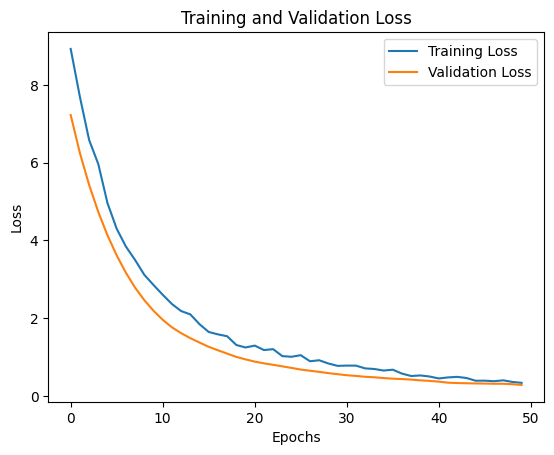

In [71]:
# Plot loss pada setiap epoch
plt.plot(history_crb.history['loss'], label='Training Loss')
plt.plot(history_crb.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 933ms/step


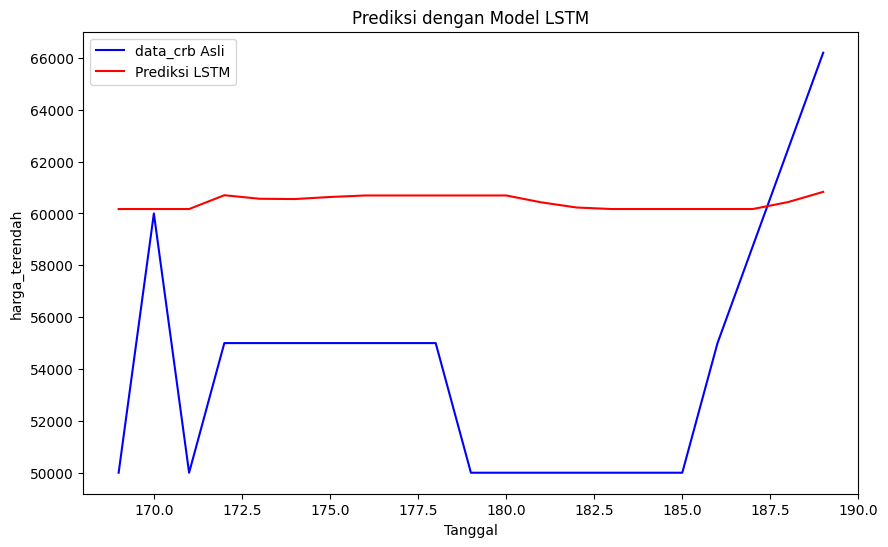

In [72]:
# Membuat prediksi dengan model LSTM
prediksi_crb = model_crb.predict(X_test_crb)

# Invers transform hasil prediksi ke skala aslinya
prediksiLSTM_crb = scaler.inverse_transform(np.concatenate((X_test_crb[:, -1], prediksi_crb.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data_crb.index[train_size + seq_length:], data_crb['harga_terendah'].values[train_size + seq_length:], label='data_crb Asli', color='blue')
plt.plot(data_crb.index[train_size + seq_length:], prediksiLSTM_crb, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('harga_terendah')
plt.legend()
plt.show()

In [73]:
# Cek MAPE

from sklearn.metrics import mean_absolute_percentage_error
mapeLSTM_crb = mean_absolute_percentage_error(data_crb['harga_terendah'].values[train_size + seq_length:], prediksiLSTM_crb)
print('MAPE:', mapeLSTM_crb)

MAPE: 0.1338982435014544


1/1 [==============================] - 0s 23ms/step
Prediksi untuk 7 hari ke depan: [[60833.008]
 [61148.81 ]
 [61291.934]
 [61336.85 ]
 [61348.594]
 [61352.676]
 [61353.89 ]]


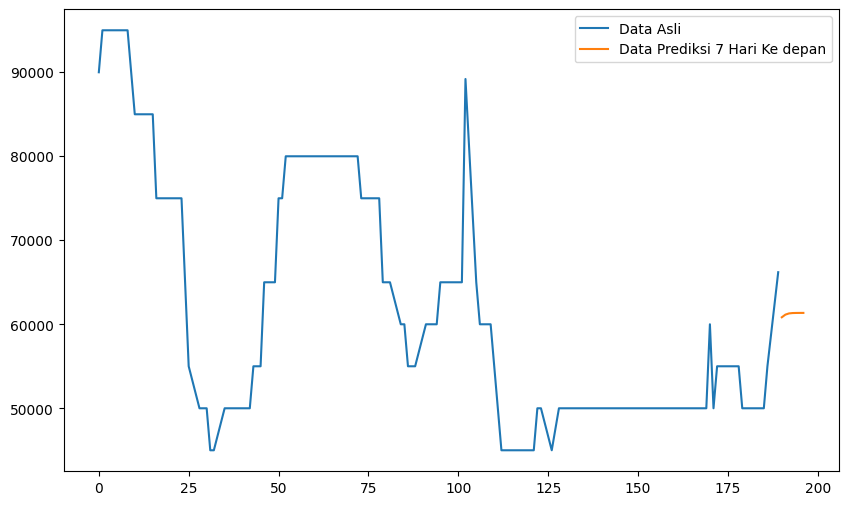

In [74]:
# Menyiapkan data untuk membuat prediksi ke depan
future_steps = 7
future_data_crb = X_test_crb[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk prediksi ke depan

# Membuat prediksi ke depan
future_predictions_crb = []
for i in range(future_steps):
    prediction = model_crb.predict(future_data_crb.reshape(1, seq_length - 1, 1))
    future_predictions_crb.append(prediction[0, 0])
    future_data_crb = np.append(future_data_crb[1:], prediction[0])  # Memperbarui data untuk prediksi berikutnya

# Invers transform hasil prediksi ke skala aslinya
future_predictions_crb = scaler.inverse_transform(np.array(future_predictions_crb).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("Prediksi untuk 7 hari ke depan:", future_predictions_crb)

# Visualisasi hasil prediksi ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data_crb)), scaler.inverse_transform(time_series_data_crb), label='Data Asli ')
plt.plot(np.arange(len(time_series_data_crb), len(time_series_data_crb) + future_steps), future_predictions_crb, label='Data Prediksi 7 Hari Ke depan')
plt.legend()
plt.show()

In [75]:
# Menampilkan hasil prediksi ke depan
print("Prediksi Harga Terendah Semangka untuk 7 hari ke depan:", future_predictions_semangka)
print("Prediksi Harga Terendah Kentang untuk 7 hari ke depan:", future_predictions_kentang)
print("Prediksi Harga Terendah Cabai Rawit Bandung untuk 7 hari ke depan:", future_predictions_crb)
print("Prediksi Harga Terendah Cabai Rawit Jabodetabek untuk 7 hari ke depan:", future_predictions_crj)
print("Prediksi Harga Terendah Cabai Keriting Bandung untuk 7 hari ke depan:", future_predictions_ckb)
print("Prediksi Harga Terendah Cabai Keriting Jabodetabek untuk 7 hari ke depan:", future_predictions_ckb)
print("Prediksi Harga Terendah Bawang Merah Bandung untuk 7 hari ke depan:", future_predictions_bmb)
print("Prediksi Bawang Merah Jabodetabek untuk 7 hari ke depan:", future_predictions_bmj)


Prediksi Harga Terendah Semangka untuk 7 hari ke depan: [[10088.961]
 [10073.481]
 [10115.681]
 [10111.376]
 [10110.84 ]
 [10109.076]
 [10109.319]]
Prediksi Harga Terendah Kentang untuk 7 hari ke depan: [[18610.541]
 [18511.398]
 [18391.223]
 [18283.047]
 [18272.816]
 [18265.24 ]
 [18261.455]]
Prediksi Harga Terendah Cabai Rawit Bandung untuk 7 hari ke depan: [[60833.008]
 [61148.81 ]
 [61291.934]
 [61336.85 ]
 [61348.594]
 [61352.676]
 [61353.89 ]]
Prediksi Harga Terendah Cabai Rawit Jabodetabek untuk 7 hari ke depan: [[51174.5  ]
 [51650.02 ]
 [51991.195]
 [52479.2  ]
 [52595.207]
 [52678.31 ]
 [52730.426]]
Prediksi Harga Terendah Cabai Keriting Bandung untuk 7 hari ke depan: [[66447.234]
 [67541.48 ]
 [68061.484]
 [68225.51 ]
 [68292.54 ]
 [68318.27 ]
 [68327.74 ]]
Prediksi Harga Terendah Cabai Keriting Jabodetabek untuk 7 hari ke depan: [[66447.234]
 [67541.48 ]
 [68061.484]
 [68225.51 ]
 [68292.54 ]
 [68318.27 ]
 [68327.74 ]]
Prediksi Harga Terendah Bawang Merah Bandung untuk 7 ha